# Paper Figures, Mapped Correlations, & other analysis figures 

This notebook will be used to:
- Show a map of the ecoregions used in this paper
- The coeficients of Lasso regression for each ecoregion. Variables that do not show up are not chosen by the Lasso. 
    - TODO: significance for chosen variables. 
- Show the historical variance explained by regularized regression for atmos and plant centric variables. 

The data shown in this notebook's figures are generated by train_burn_area_classifier.ipynb

In [1]:
# Chosen experiment
experiment = "better_beta_detrended" 

In [2]:
import numpy as np
from matplotlib import pylab as plt
from matplotlib import cm
from matplotlib import pyplot
import matplotlib.gridspec as gridspec
import matplotlib
import seaborn as sns
import pandas as pd 
import geopandas as geo
import seaborn as sns
import os
import pickle
from matplotlib.patches import Patch # For making custom legends 
from matplotlib.lines import Line2D

In [3]:
dataDir = os.path.join('..', 'Data', 'Analysis', experiment)
geo_df_file = os.path.join(dataDir, 'results_geo_df')

#### Load the Lasso coeficient and $R^2$ values created by train_burn_area_classifier.ipynb
- This is a GeoDataGrame where the shapes and associated data are stored as a single data structure

In [4]:
divisions = geo.read_file(geo_df_file)
divisions.index = divisions.division
divisions.columns

Index(['AREA', 'division', 'OLS_r2', 'lasso_r2', 'lasso_alph', 'atmos_r2',
       'atmos_alph', 'plant_r2', 'plant_alph', 'geometry'],
      dtype='object')

In [5]:
usa = geo.read_file('../Data/GIS/cb_2017_us_state_500k')

Set static division colors 

In [6]:
n_div = divisions.shape[0]
tab10 = cm.get_cmap('tab10', n_div)
division_colors = tab10(range(n_div))
division_colors[0][0:3]
division_colors_hex = []
for i in range(n_div) :
    division_colors_hex.append(matplotlib.colors.to_hex(division_colors[i][0:3]))
    
division_colors_hex
divisions['division_colors'] = division_colors_hex

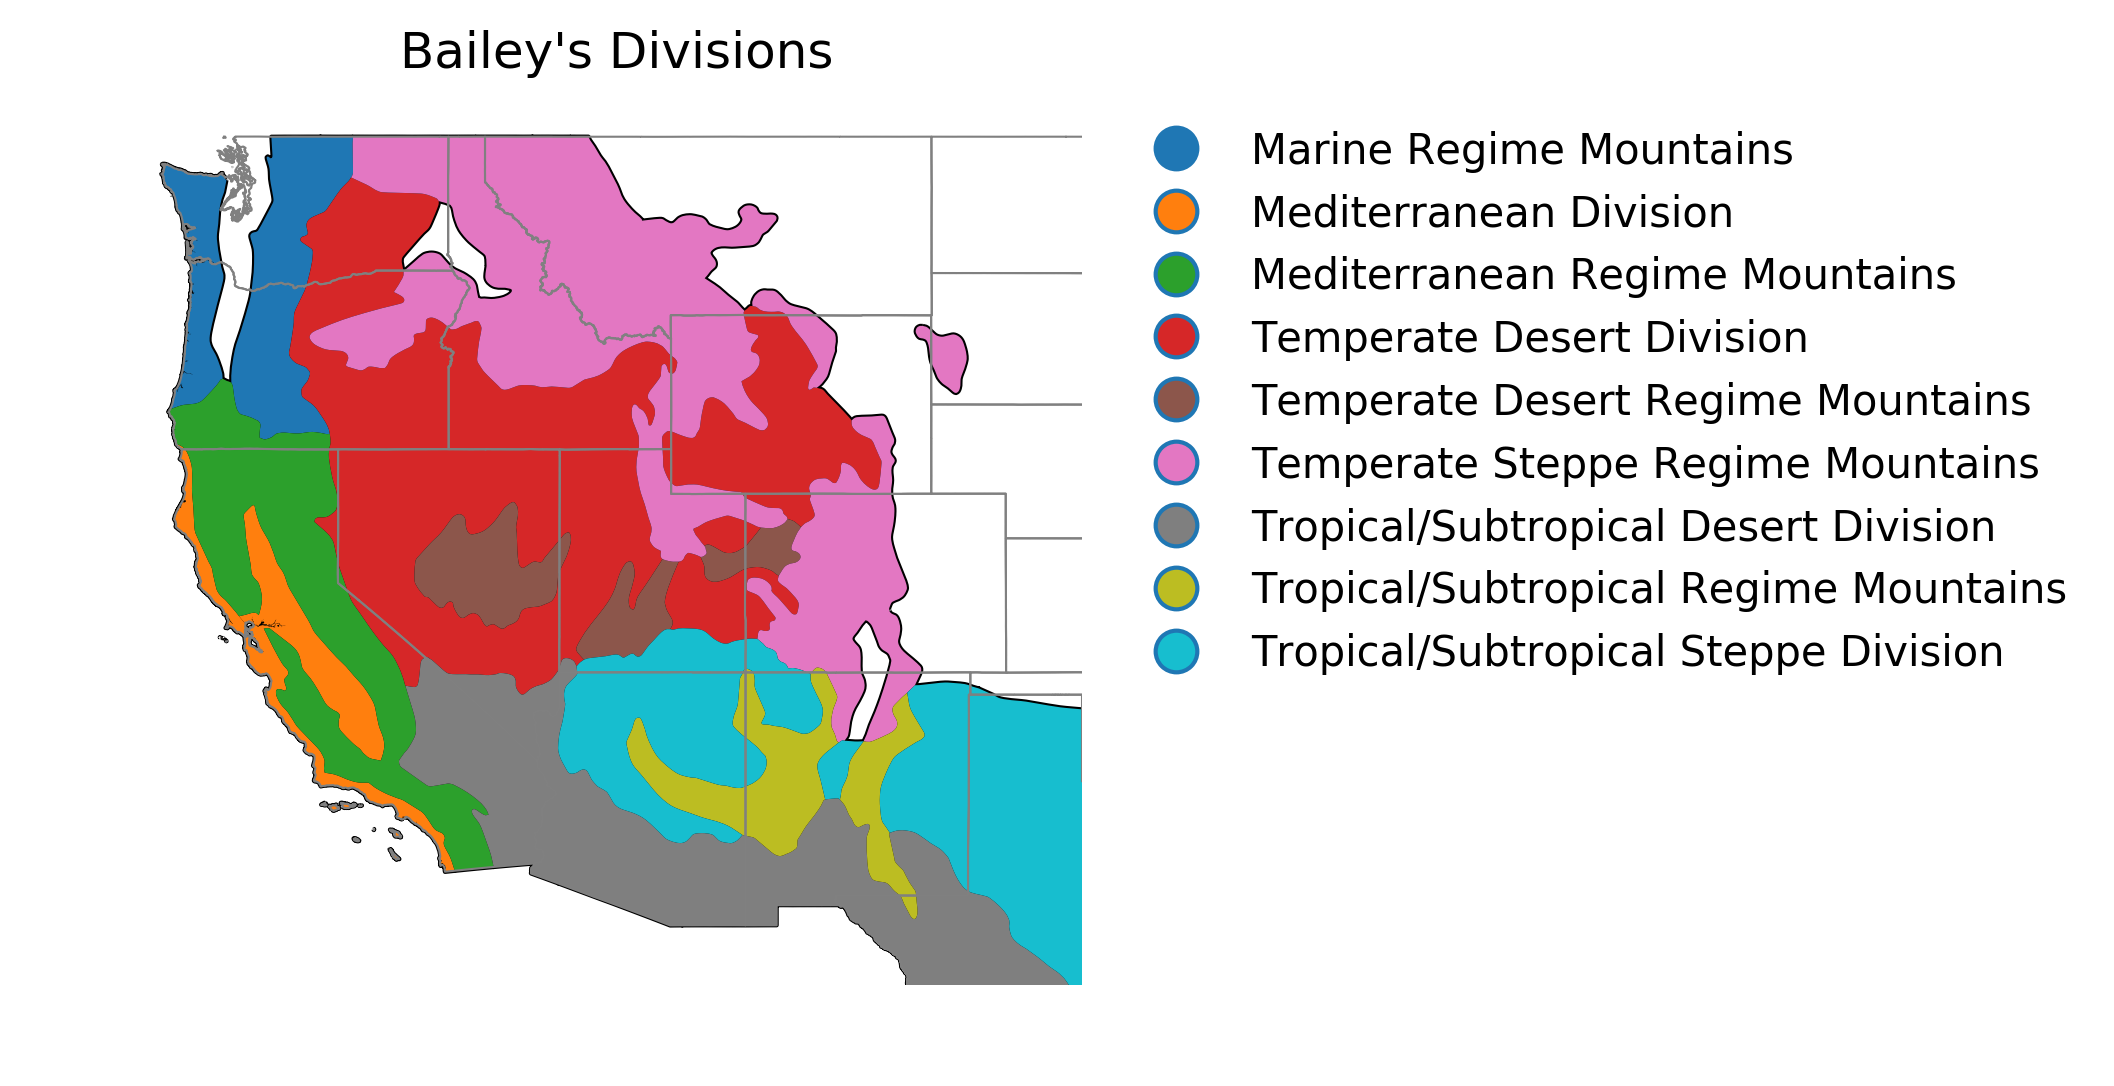

In [7]:
# Show the disolved divisions 
f, ax = plt.subplots(1, figsize=(4, 4), dpi=300)
ax.axis('off')

#base = usa.plot(ax=ax, color="white", edgecolor="black")
base = divisions.plot(ax=ax, color="white", edgecolor="black")
ax1 = divisions.plot(ax=base, column='division', cmap=tab10, categorical=True,legend=True)
ax1.set_xlim(left=-125, right=-100)
ax1.set_ylim(bottom=30, top=50)
plt.title("Bailey's Divisions")

ax2=usa.plot(ax=base, facecolor='none', edgecolor="gray", linewidth=0.5)
ax2.set_xlim(left=-125, right=-100)
ax2.set_ylim(bottom=30, top=50)
ax2.set_aspect(1.2)

# Handle the legend
leg = ax1.get_legend()
leg.set_bbox_to_anchor((0.6, 1, 1.5, 0.0))
leg.set_label(divisions.division)
leg.set_frame_on(False)
plt.savefig(fname=os.path.join(dataDir, "divinsions_map.png"), format='png', bbox_inches="tight")
plt.show()

### Show the variance explained by each of the linear models
- Not to be shown in paper, but important for back-end analysis purposes. 

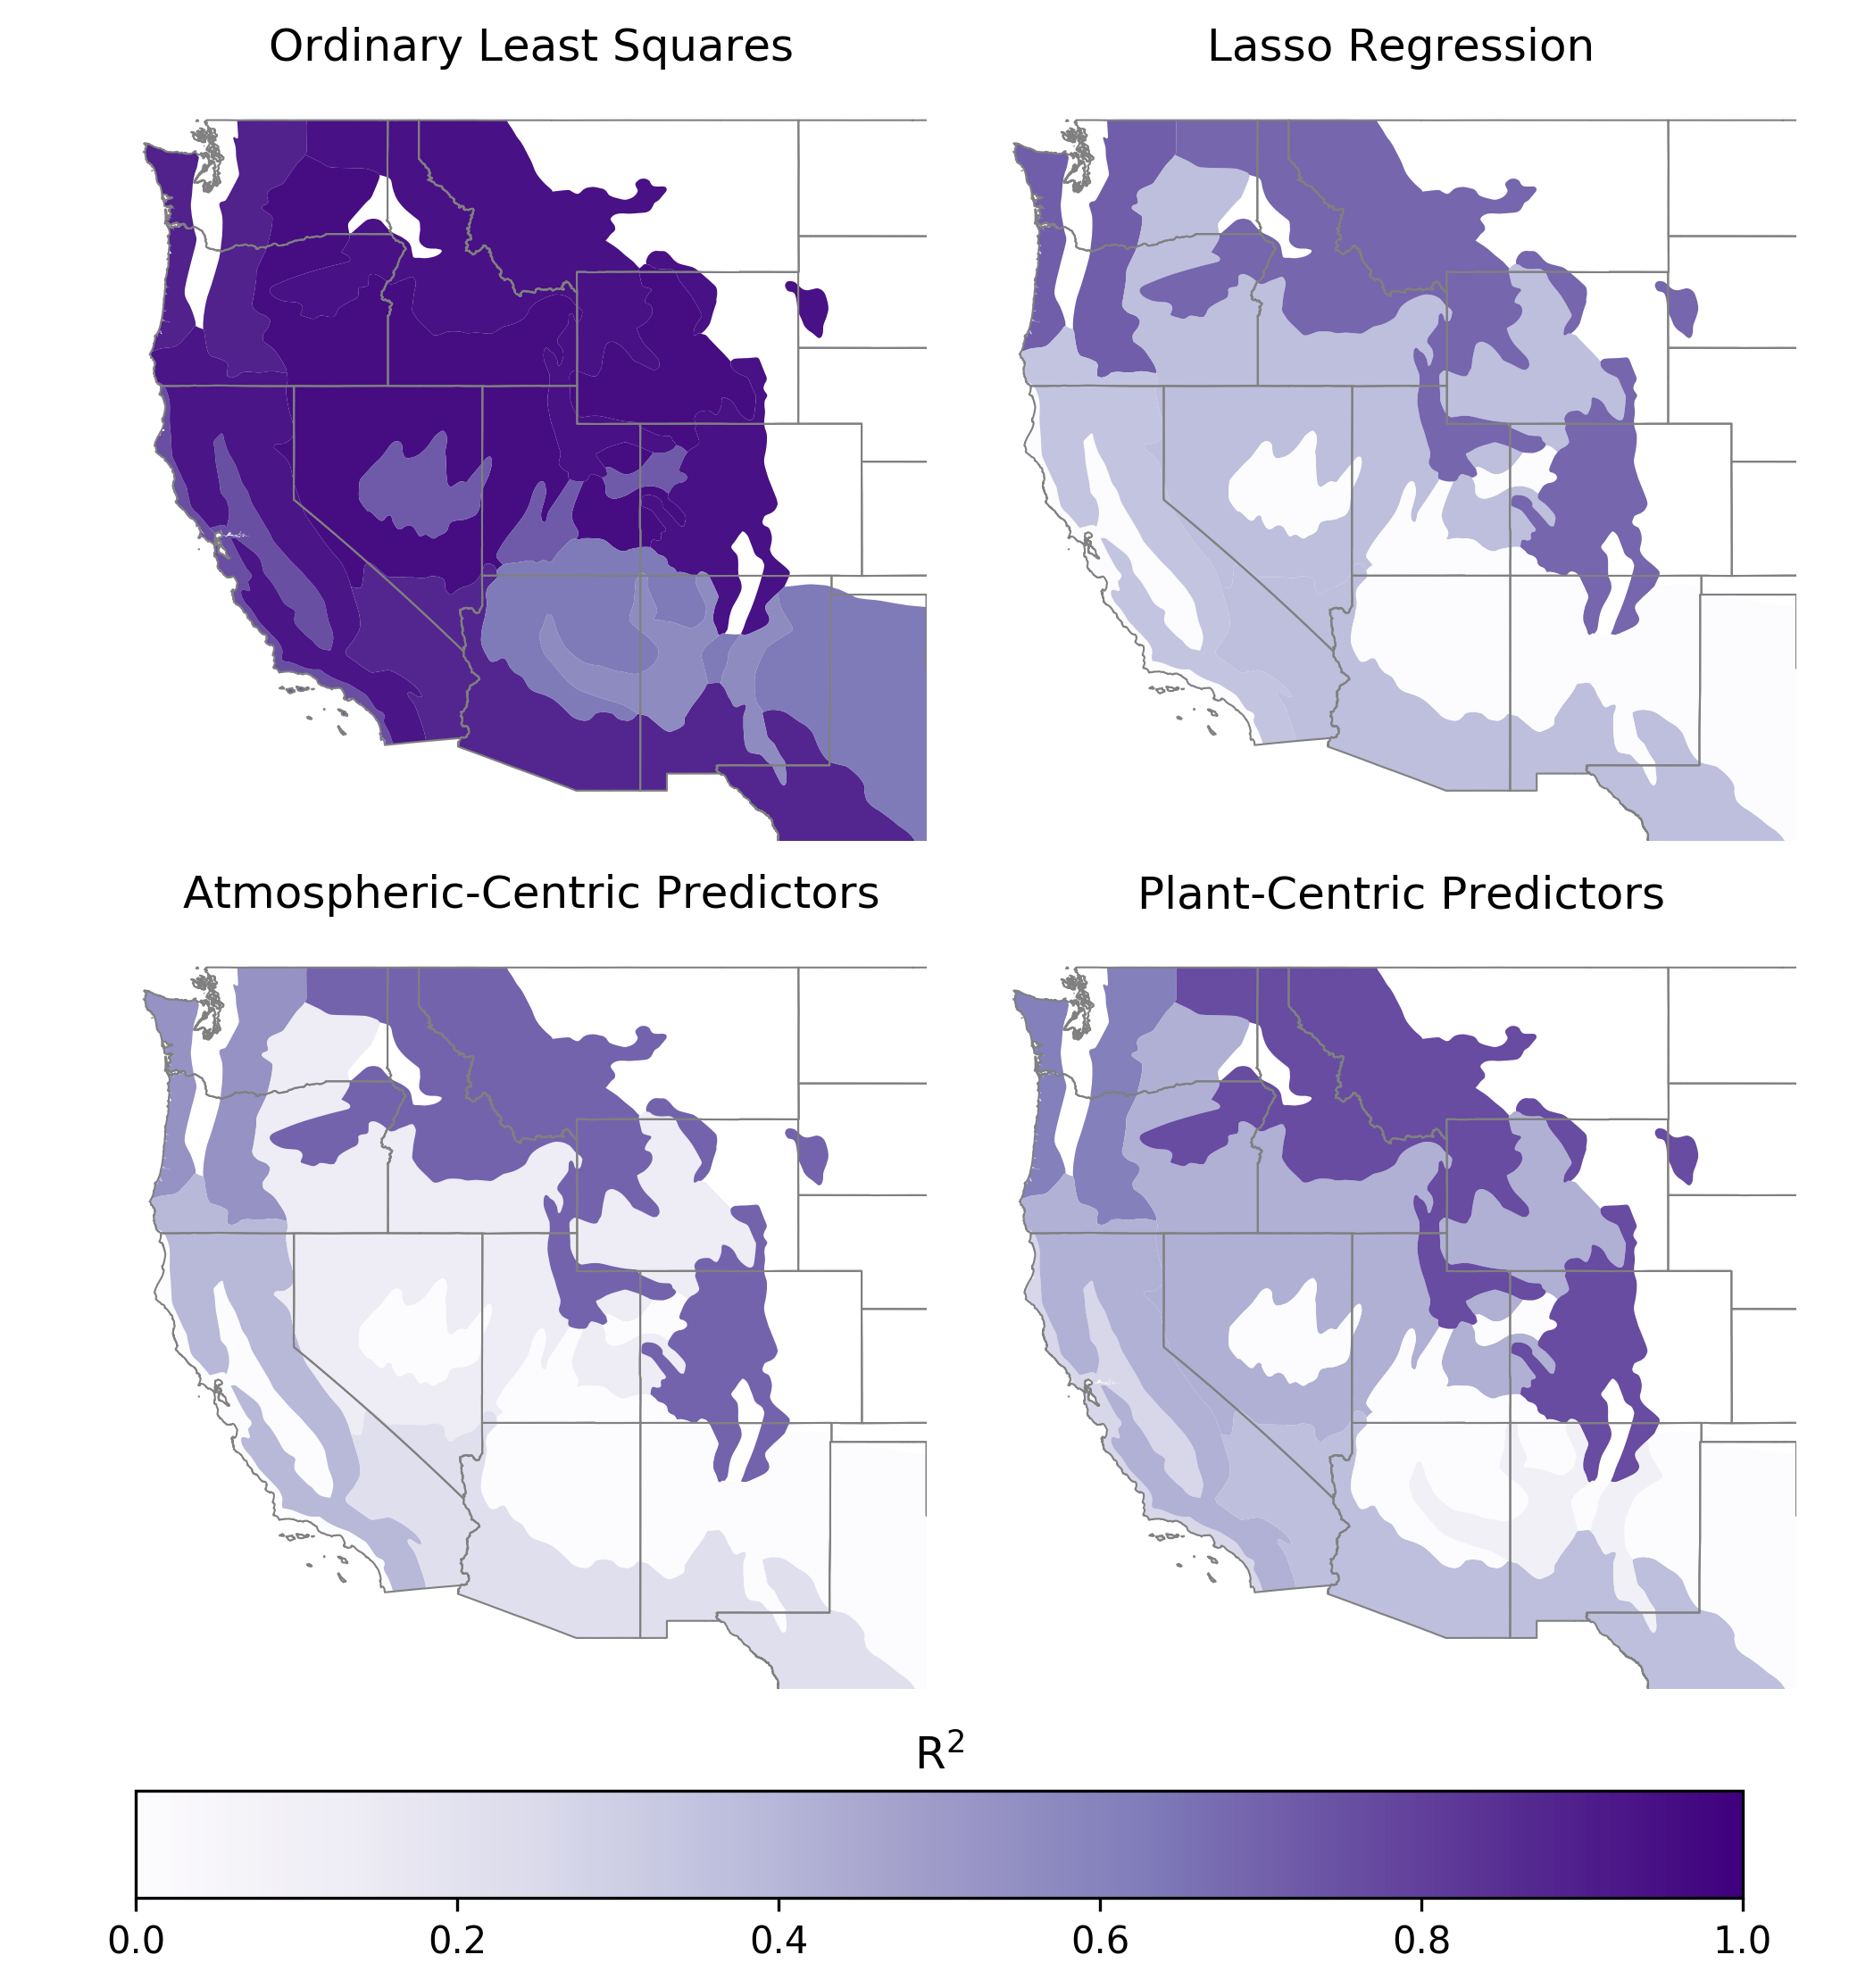

In [8]:
asp = 1.2 # aspect 
fig, (row1, row2) = pyplot.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(8, 8), dpi=300)
row1[0].axis('off')
row1[1].axis('off')
row2[0].axis('off')
row2[1].axis('off')
cm = "Purples"
divisions.plot(ax=row1[0], column='OLS_r2', vmin=0, vmax=1, legend=False, cmap=cm)
usa.plot(ax=row1[0], facecolor='none', edgecolor="gray", linewidth=0.5)
row1[0].set_xlim(left=-125, right=-100)
row1[0].set_ylim(bottom=30, top=50)
row1[0].set_title("Ordinary Least Squares")
row1[0].set_aspect(asp)

divisions.plot(ax=row1[1], column='lasso_r2', vmin=0, vmax=1, legend=False, cmap=cm)
usa.plot(ax=row1[1], facecolor='none', edgecolor="gray", linewidth=0.5)
row1[1].set_xlim(left=-125, right=-100)
row1[1].set_ylim(bottom=30, top=50)
row1[1].set_title("Lasso Regression")
row1[1].set_aspect(asp)

divisions.plot(ax=row2[0], column='atmos_r2', vmin=0, vmax=1, legend=False, cmap=cm)
usa.plot(ax=row2[0], facecolor='none', edgecolor="gray", linewidth=0.5)
row2[0].set_xlim(left=-125, right=-100)
row2[0].set_ylim(bottom=30, top=50)
row2[0].set_title("Atmospheric-Centric Predictors")
row2[0].set_aspect(asp)

divisions.plot(ax=row2[1], column='plant_r2', vmin=0, vmax=1, legend=False, cmap=cm)
usa.plot(ax=row2[1], facecolor='none', edgecolor="gray", linewidth=0.5)
row2[1].set_xlim(left=-125, right=-100)
row2[1].set_ylim(bottom=30, top=50)
row2[1].set_title("Plant-Centric Predictors")
row2[1].set_aspect(asp)

plt.subplots_adjust(wspace=0.1, hspace=0.1) # reduce spaces between panes

im = plt.gca().get_children()[0]
# [left, bottom, width, height]
# for horizontal bar
cax = fig.add_axes([0.25/2, 0.03, 0.75,0.05]) 
fig.colorbar(im, cax=cax, orientation="horizontal")
plt.title("R$^{2}$")
#cax = fig.add_axes([0.25, .2, 0.03, 0.4]) 
#fig.colorbar(im, cax=cax, orientation="vertical")
plt.savefig(os.path.join(dataDir, "variance_explained_map.png"), bbox_inches="tight")
plt.show()

# Figure 2
### Show only atmos- and plant-centric

The max R-squared value is 0.764373 


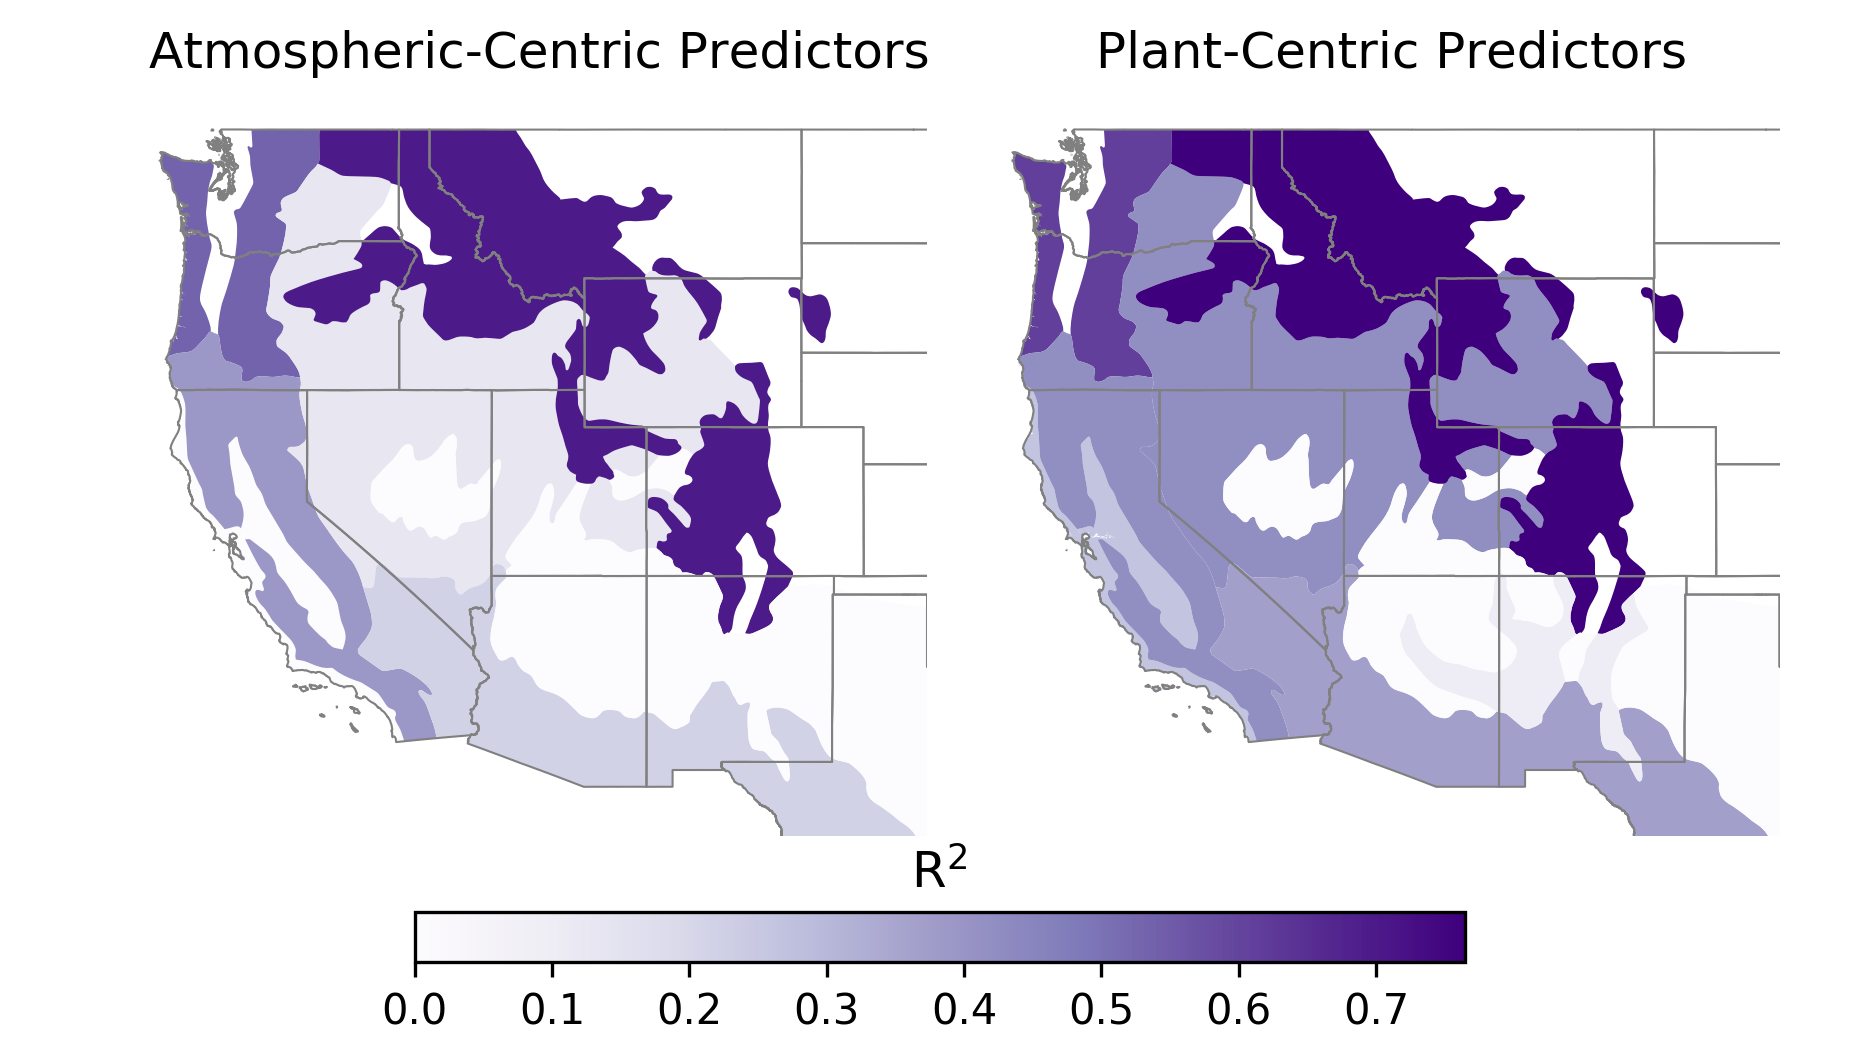

In [9]:
# Figure properties
asp=1.2
cm = "Purples"
max_r_squared = np.max((divisions["atmos_r2"], divisions["plant_r2"]) )
print("The max R-squared value is %f " % max_r_squared)
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=True, sharey=True, figsize=(7, 3.3), dpi=300)
ax1.axis('off')
ax2.axis('off')

#fig.suptitle('1984-2016 Burn Area Variance Explained')

divisions.plot(ax=ax1, column='atmos_r2', vmin=0, vmax=max_r_squared, legend=False, cmap=cm)
usa.plot(ax=ax1, facecolor='none', edgecolor="gray", linewidth=0.5)
ax1.set_xlim(left=-125, right=-100)
ax1.set_ylim(bottom=30, top=50)
ax1.set_title("Atmospheric-Centric Predictors")
ax1.set_aspect(asp)


divisions.plot(ax=ax2, column='plant_r2', vmin=0, vmax=max_r_squared, legend=False, cmap=cm)
usa.plot(ax=ax2, facecolor='none', edgecolor="gray", linewidth=0.5)
ax2.set_xlim(left=-125, right=-100)
ax2.set_ylim(bottom=30, top=50)
ax2.set_title("Plant-Centric Predictors")
ax2.set_aspect(asp)

plt.subplots_adjust(wspace=0.1, hspace=0) # reduce spaces between panes

im = plt.gca().get_children()[0]
# [left, bottom, width, height]
# for horizontal bar
cax = fig.add_axes([0.25, 0, 0.5,0.05]) 
fig.colorbar(im, cax=cax, orientation="horizontal")
plt.title("R$^{2}$")
#cax = fig.add_axes([0.25, .2, 0.03, 0.4]) 
#fig.colorbar(im, cax=cax, orientation="vertical")
plt.savefig(os.path.join(dataDir, "plant_v_atmos_variance_explained_map.png"), bbox_inches="tight")
plt.show()

Create a matrix of coefs from the predicts and Lasso. Use built in functions rather than for loops

In [10]:
lasso_all_coefs   = pd.read_csv(os.path.join(dataDir, 'lasso_all_coefs.csv'), index_col=0)
lasso_plant_coefs = pd.read_csv(os.path.join(dataDir, 'lasso_plant_coefs.csv'), index_col=0)
lasso_atmos_coefs = pd.read_csv(os.path.join(dataDir,'lasso_atmos_coefs.csv'), index_col=0)
lasso_combined_coefs = pd.read_csv(os.path.join(dataDir,'lasso_combined_coefs.csv'), index_col=0)

Remove all columns where every coef is zero. Those are variables we do not need to plot. 

In [11]:
def rm_zero_column(df) :
    """Remove any column where the sum is zero"""
    df_ = df.iloc[:, np.array(df.sum() != 0)]
    # Set -0 to zero
    return df_.where(df_!=0, 0)

In [12]:
lasso_all_coefs   = rm_zero_column(lasso_all_coefs)
lasso_plant_coefs = rm_zero_column(lasso_plant_coefs)
lasso_atmos_coefs = rm_zero_column(lasso_atmos_coefs)
lasso_combined_coefs = rm_zero_column(lasso_combined_coefs)

### Show the coefs when ALL variables where given to the Lasso at once. 

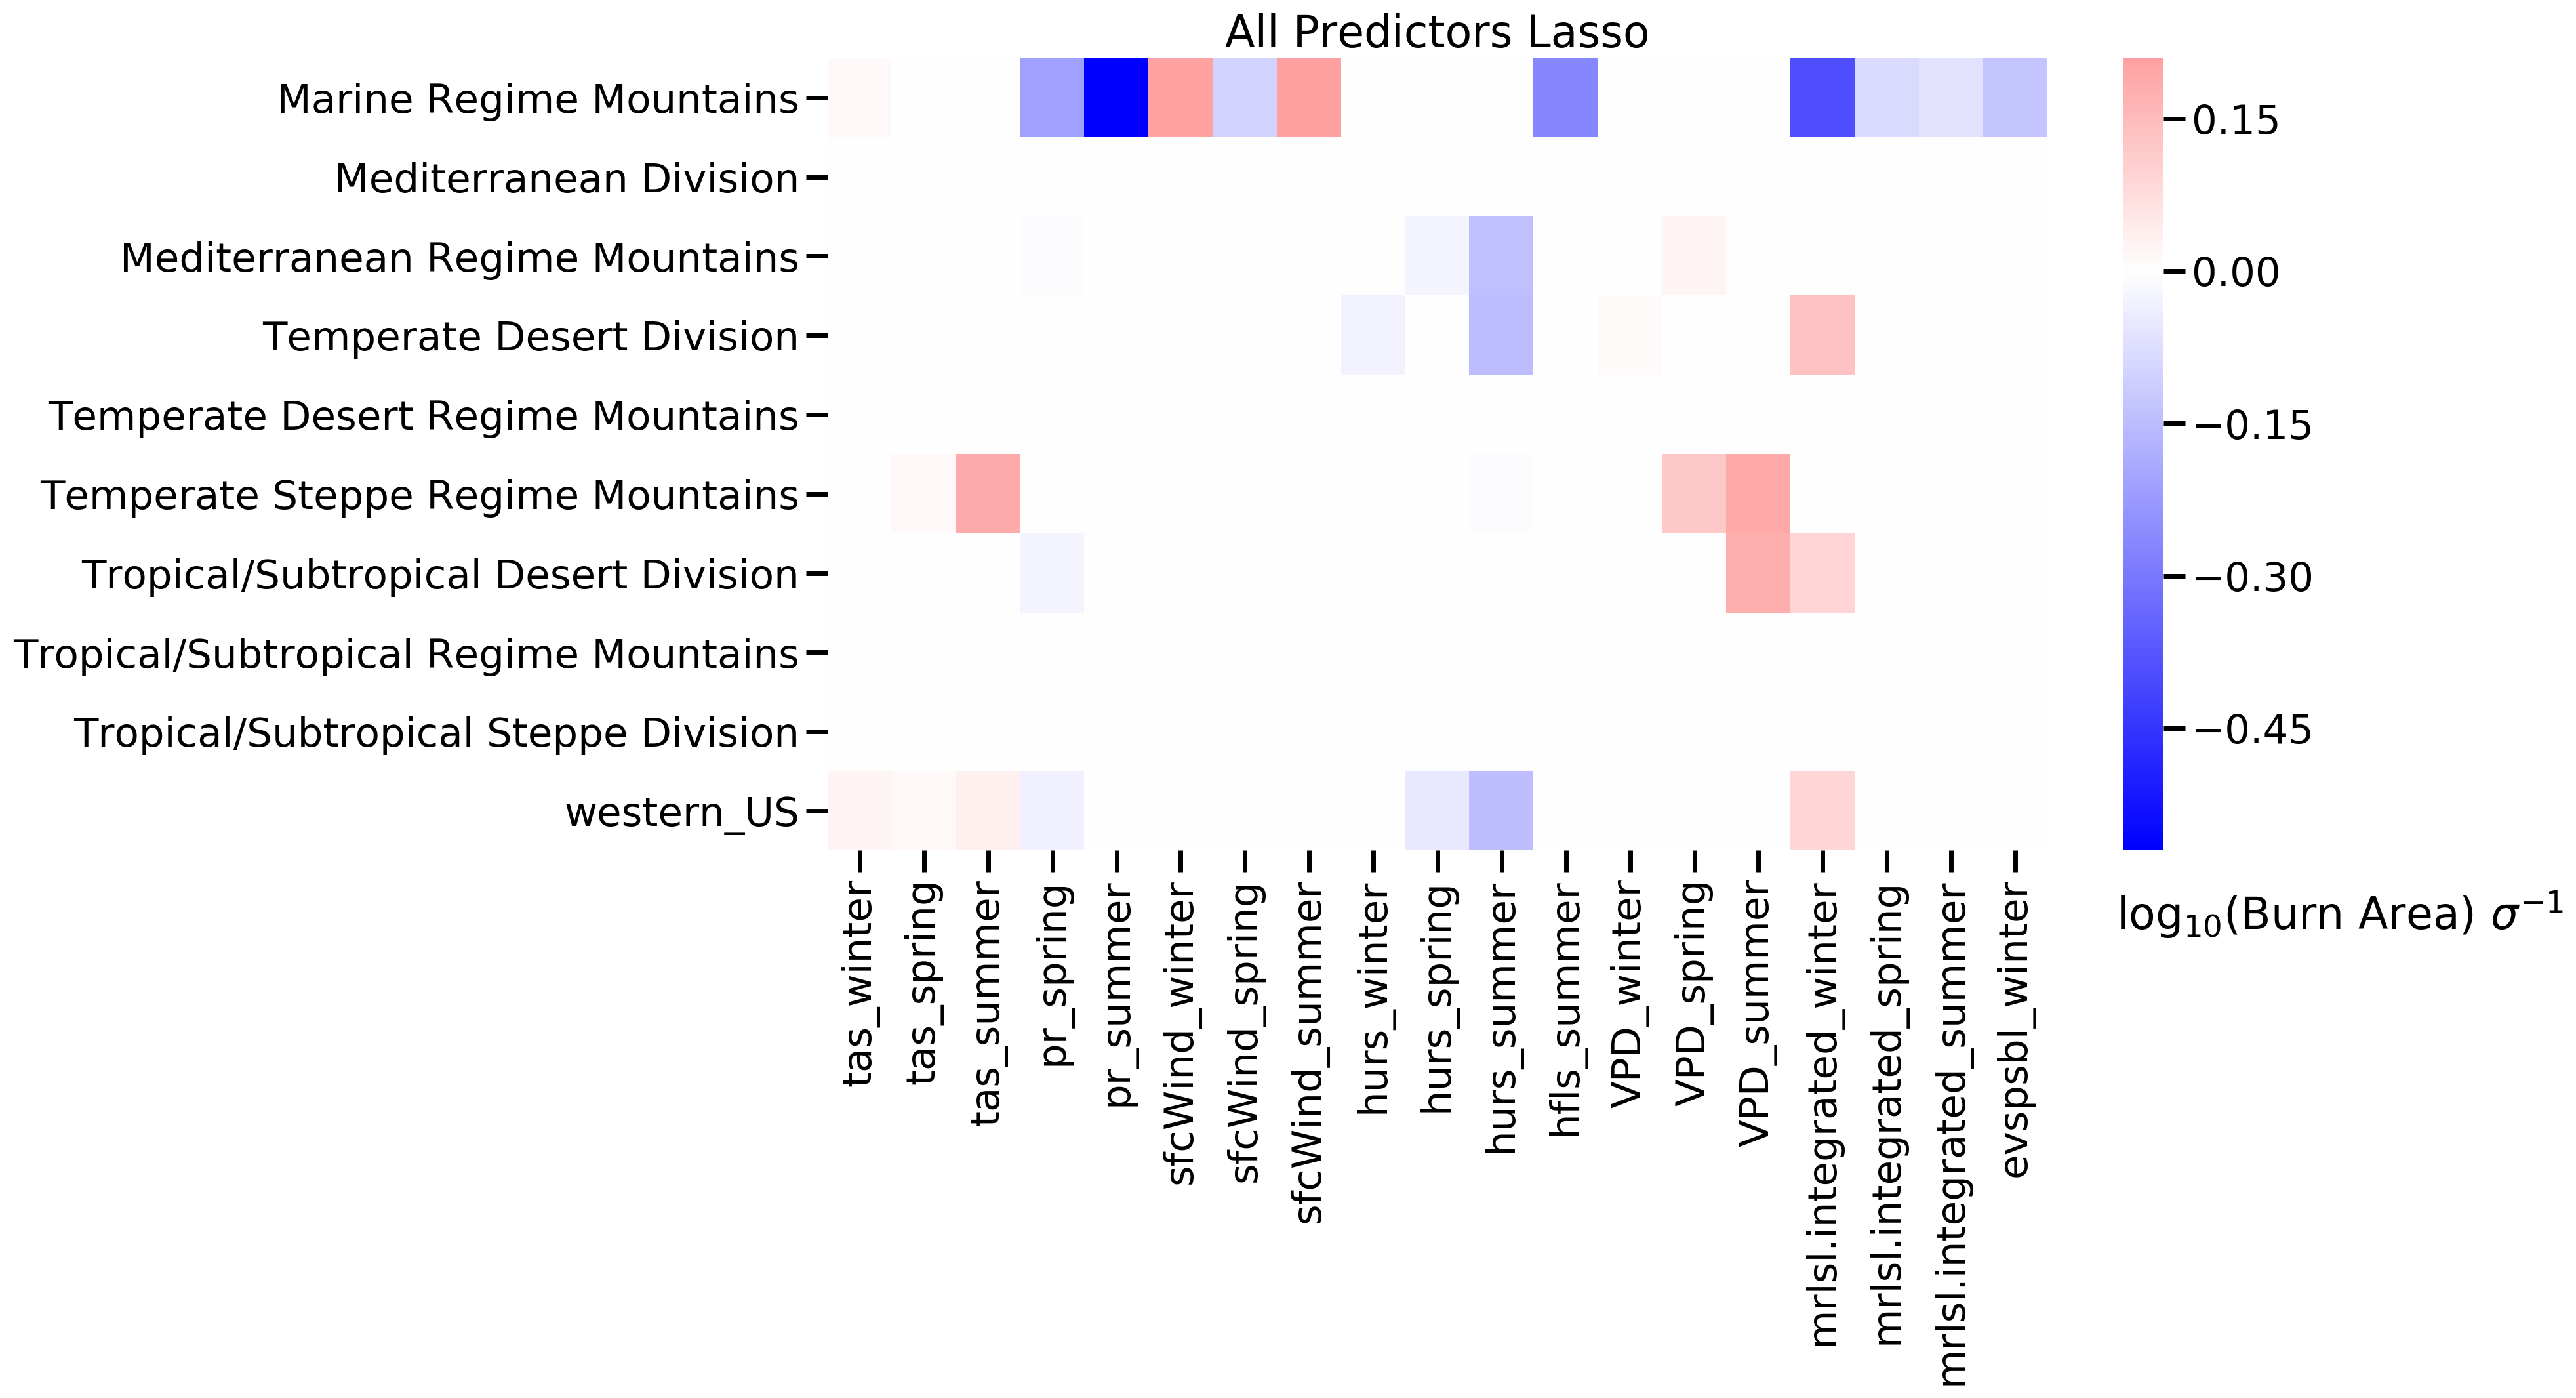

In [13]:
with sns.plotting_context("poster") :
    # TODO: Show r-squared on this plot 
    f, ax = plt.subplots(figsize=(15, 8), dpi=200)
    ax1 = sns.heatmap(lasso_all_coefs, center=0, cmap="bwr")
    ax1.set(xlabel="", ylabel="", title="All Predictors Lasso")
    f.text(x=0.78, y=.05, s="log$_{10}$(Burn Area) $\sigma^{-1}$")
    plt.savefig(os.path.join(dataDir, "lasso_all_coefs_heat_matrix.png"), bbox_inches='tight')
    #plt.xticks(rotation=80)
    plt.show()

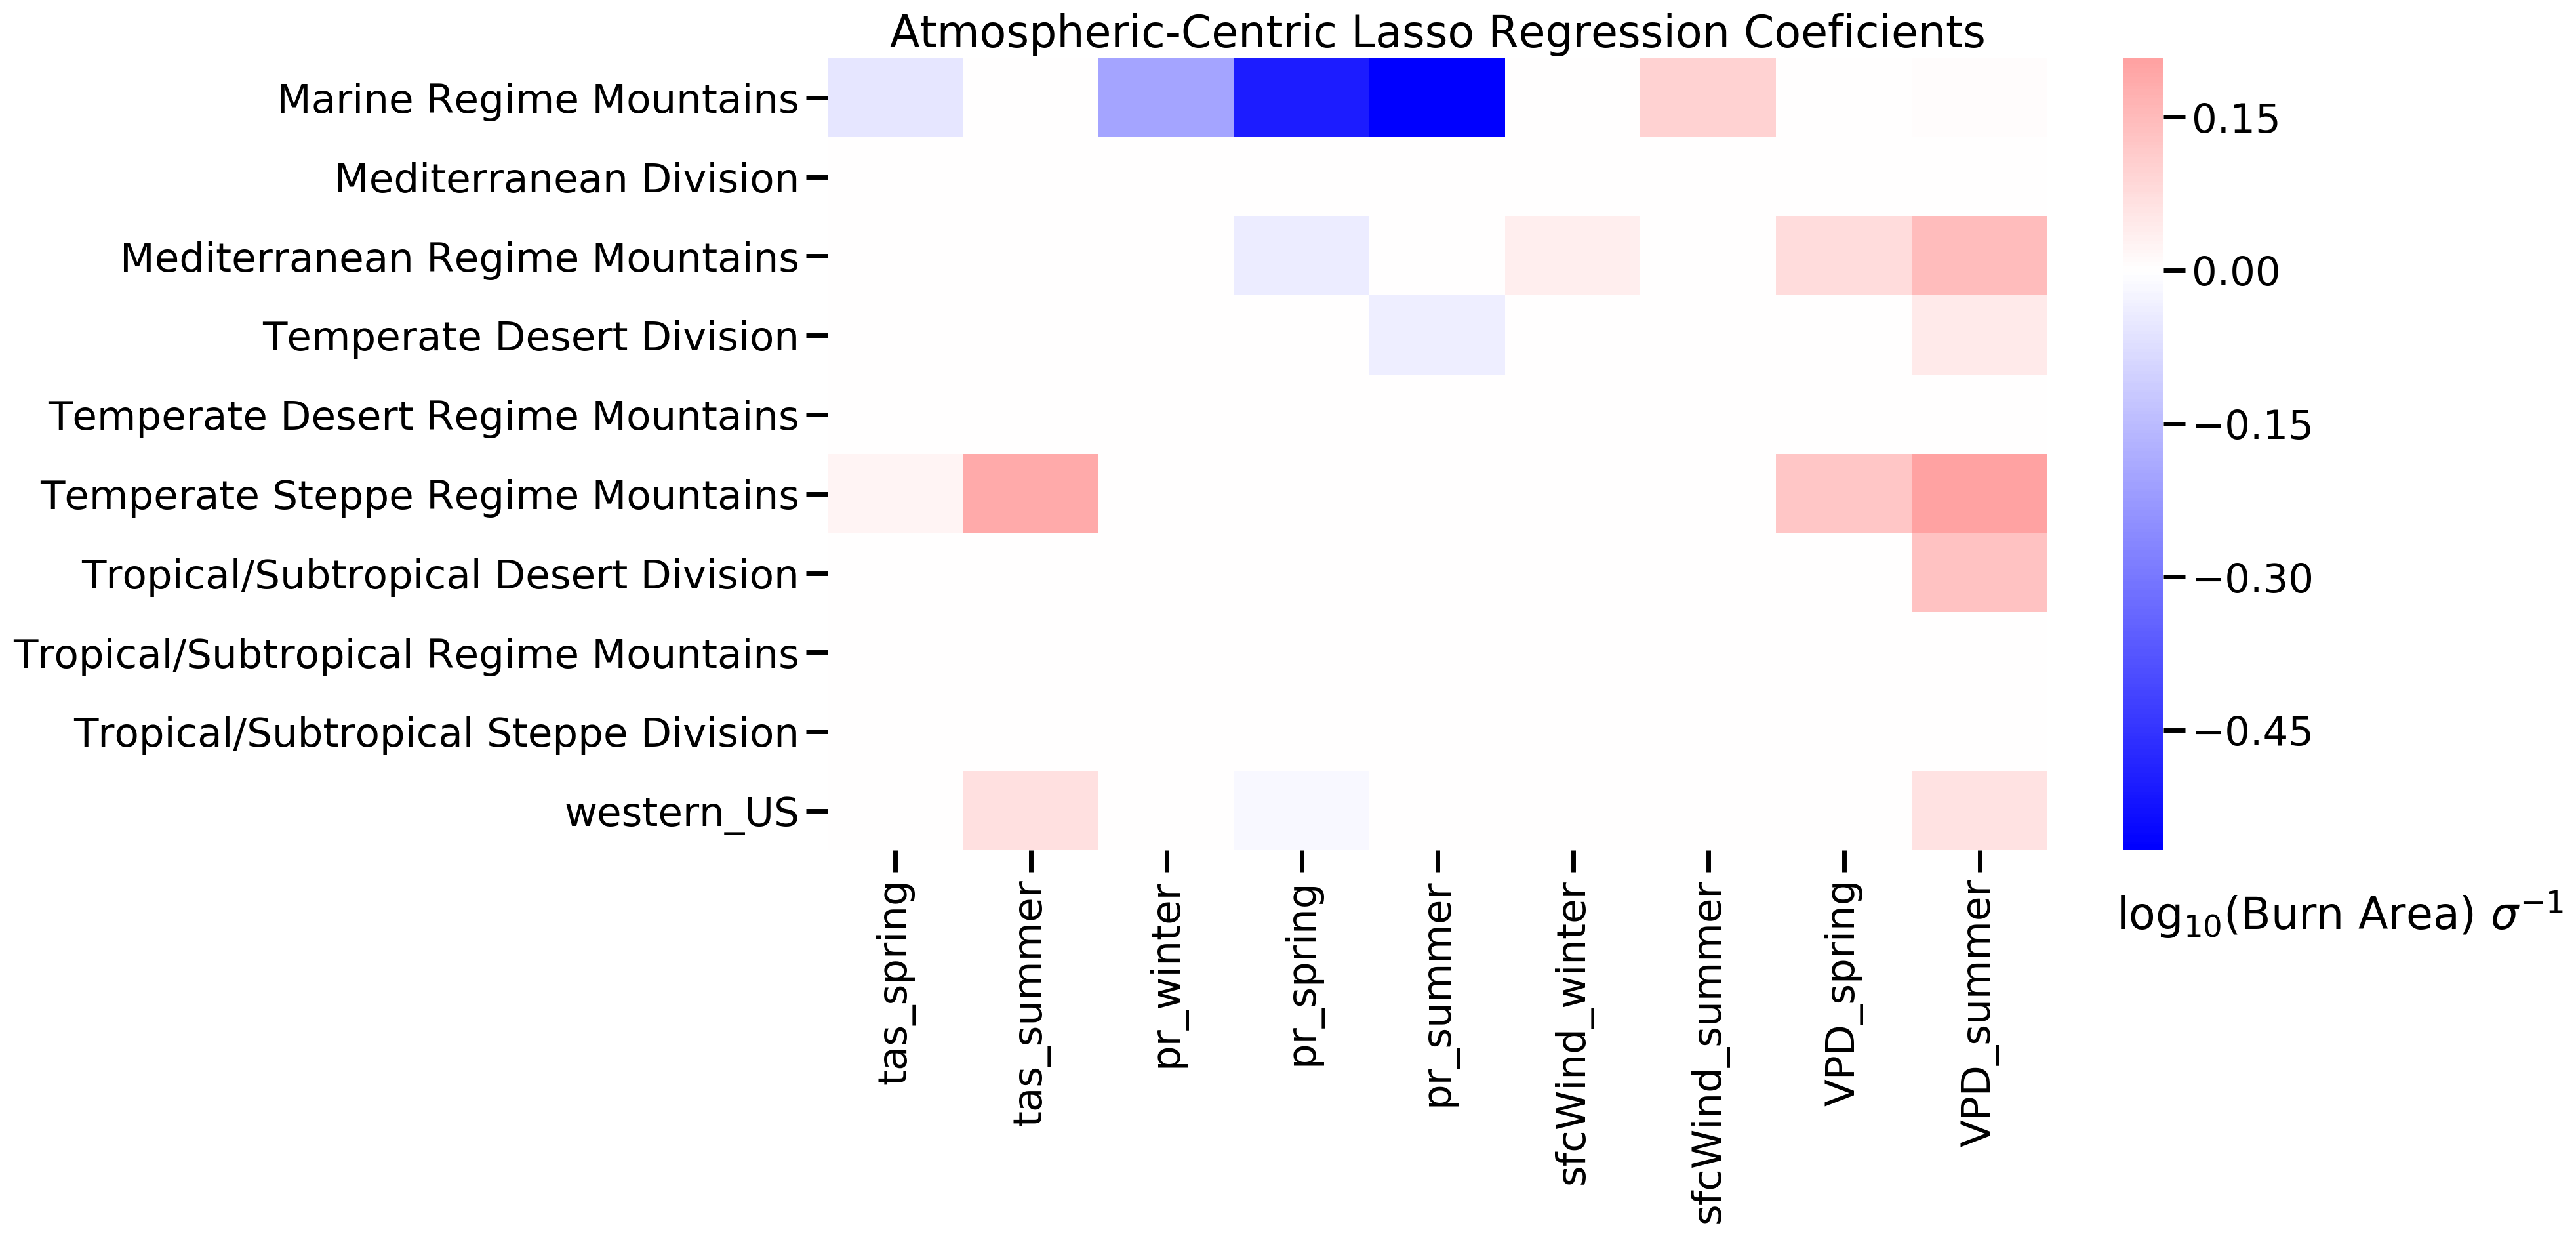

In [14]:
with sns.plotting_context("poster") :
    # TODO: Show r-squared on this plot 
    f, ax = plt.subplots(figsize=(15, 8), dpi=200)
    ax1 = sns.heatmap(lasso_atmos_coefs, center=0, cmap="bwr")
    ax1.set(xlabel="", ylabel="", title="Atmospheric-Centric Lasso Regression Coeficients")
    f.text(x=0.78, y=.05, s="log$_{10}$(Burn Area) $\sigma^{-1}$")
    plt.savefig(os.path.join(dataDir, "lasso_atmos_coefs_heat_matrix.png"), bbox_inches='tight')
    plt.show()

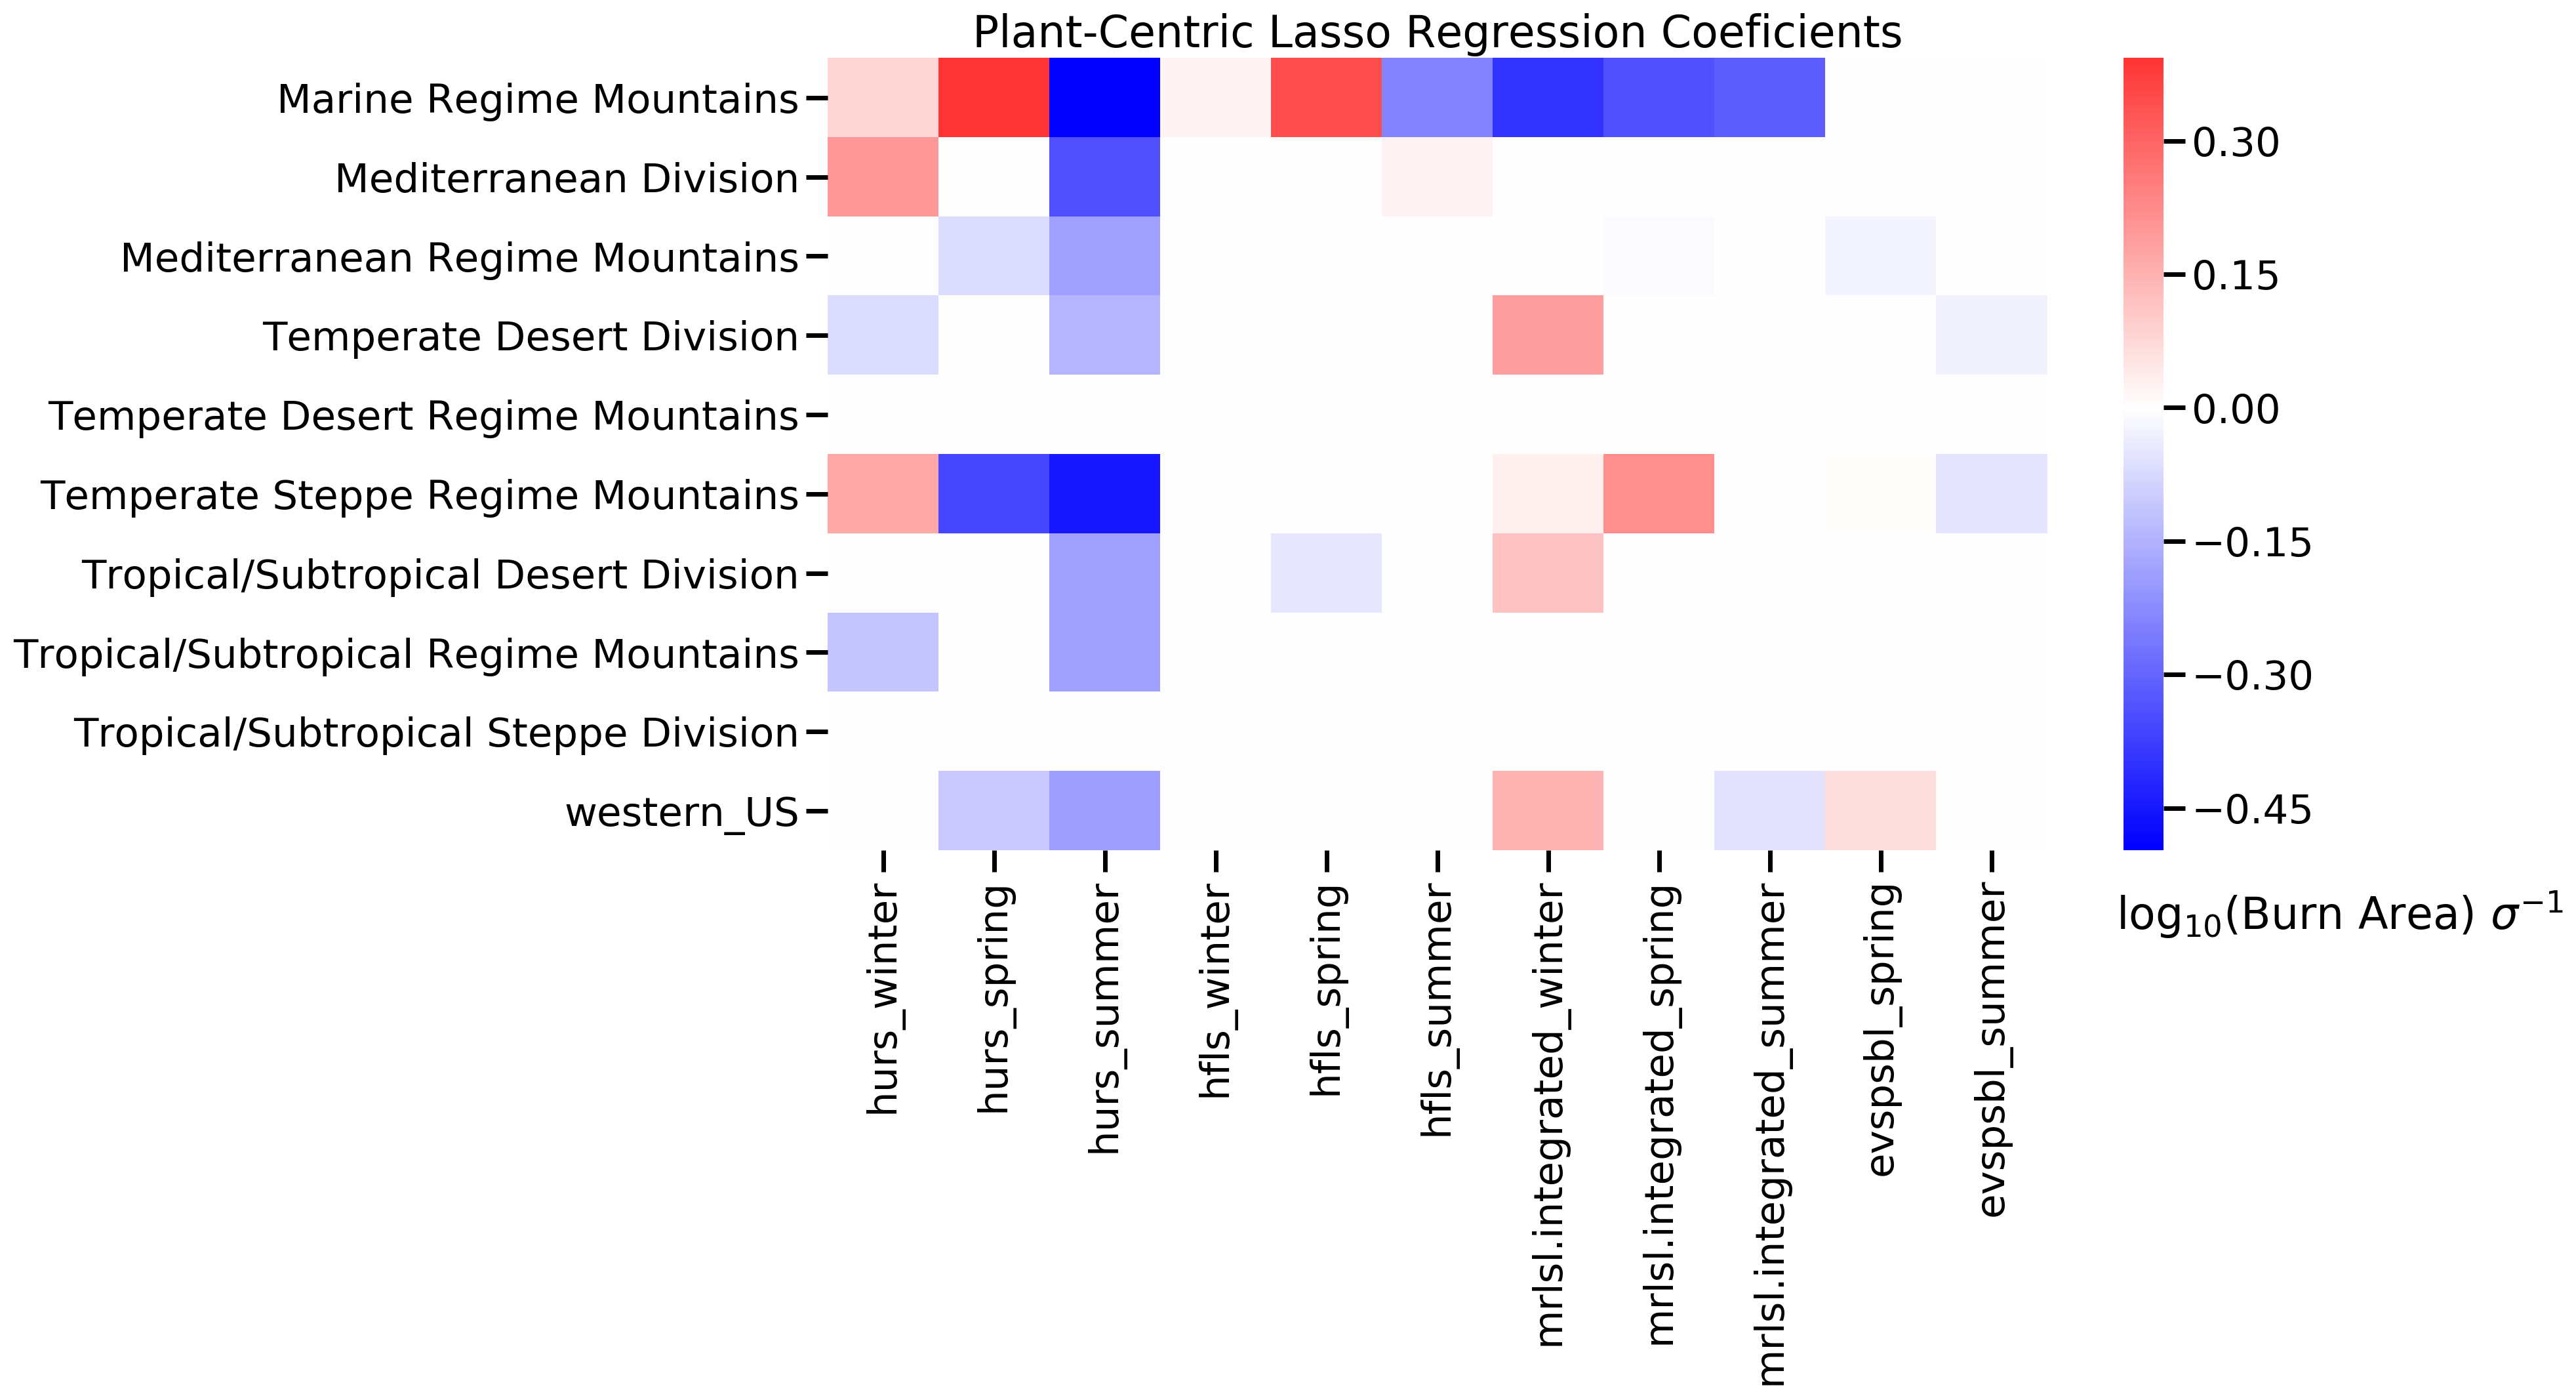

In [15]:
with sns.plotting_context("poster") :
    # TODO: Show r-squared on this plot 
    f, ax = plt.subplots(figsize=(15, 8), dpi=200)
    ax1 = sns.heatmap(lasso_plant_coefs, center=0, cmap="bwr")
    ax1.set(xlabel="", ylabel="", title="Plant-Centric Lasso Regression Coeficients")
    f.text(x=0.78, y=.05, s="log$_{10}$(Burn Area) $\sigma^{-1}$")
    plt.savefig(os.path.join(dataDir, "lasso_plant_coefs_heat_matrix.png"), bbox_inches='tight')
    plt.show()

## Figure 3 in paper 
# TODO: Make sure there is nothing lazy going on here with legacy hardcoded values. 

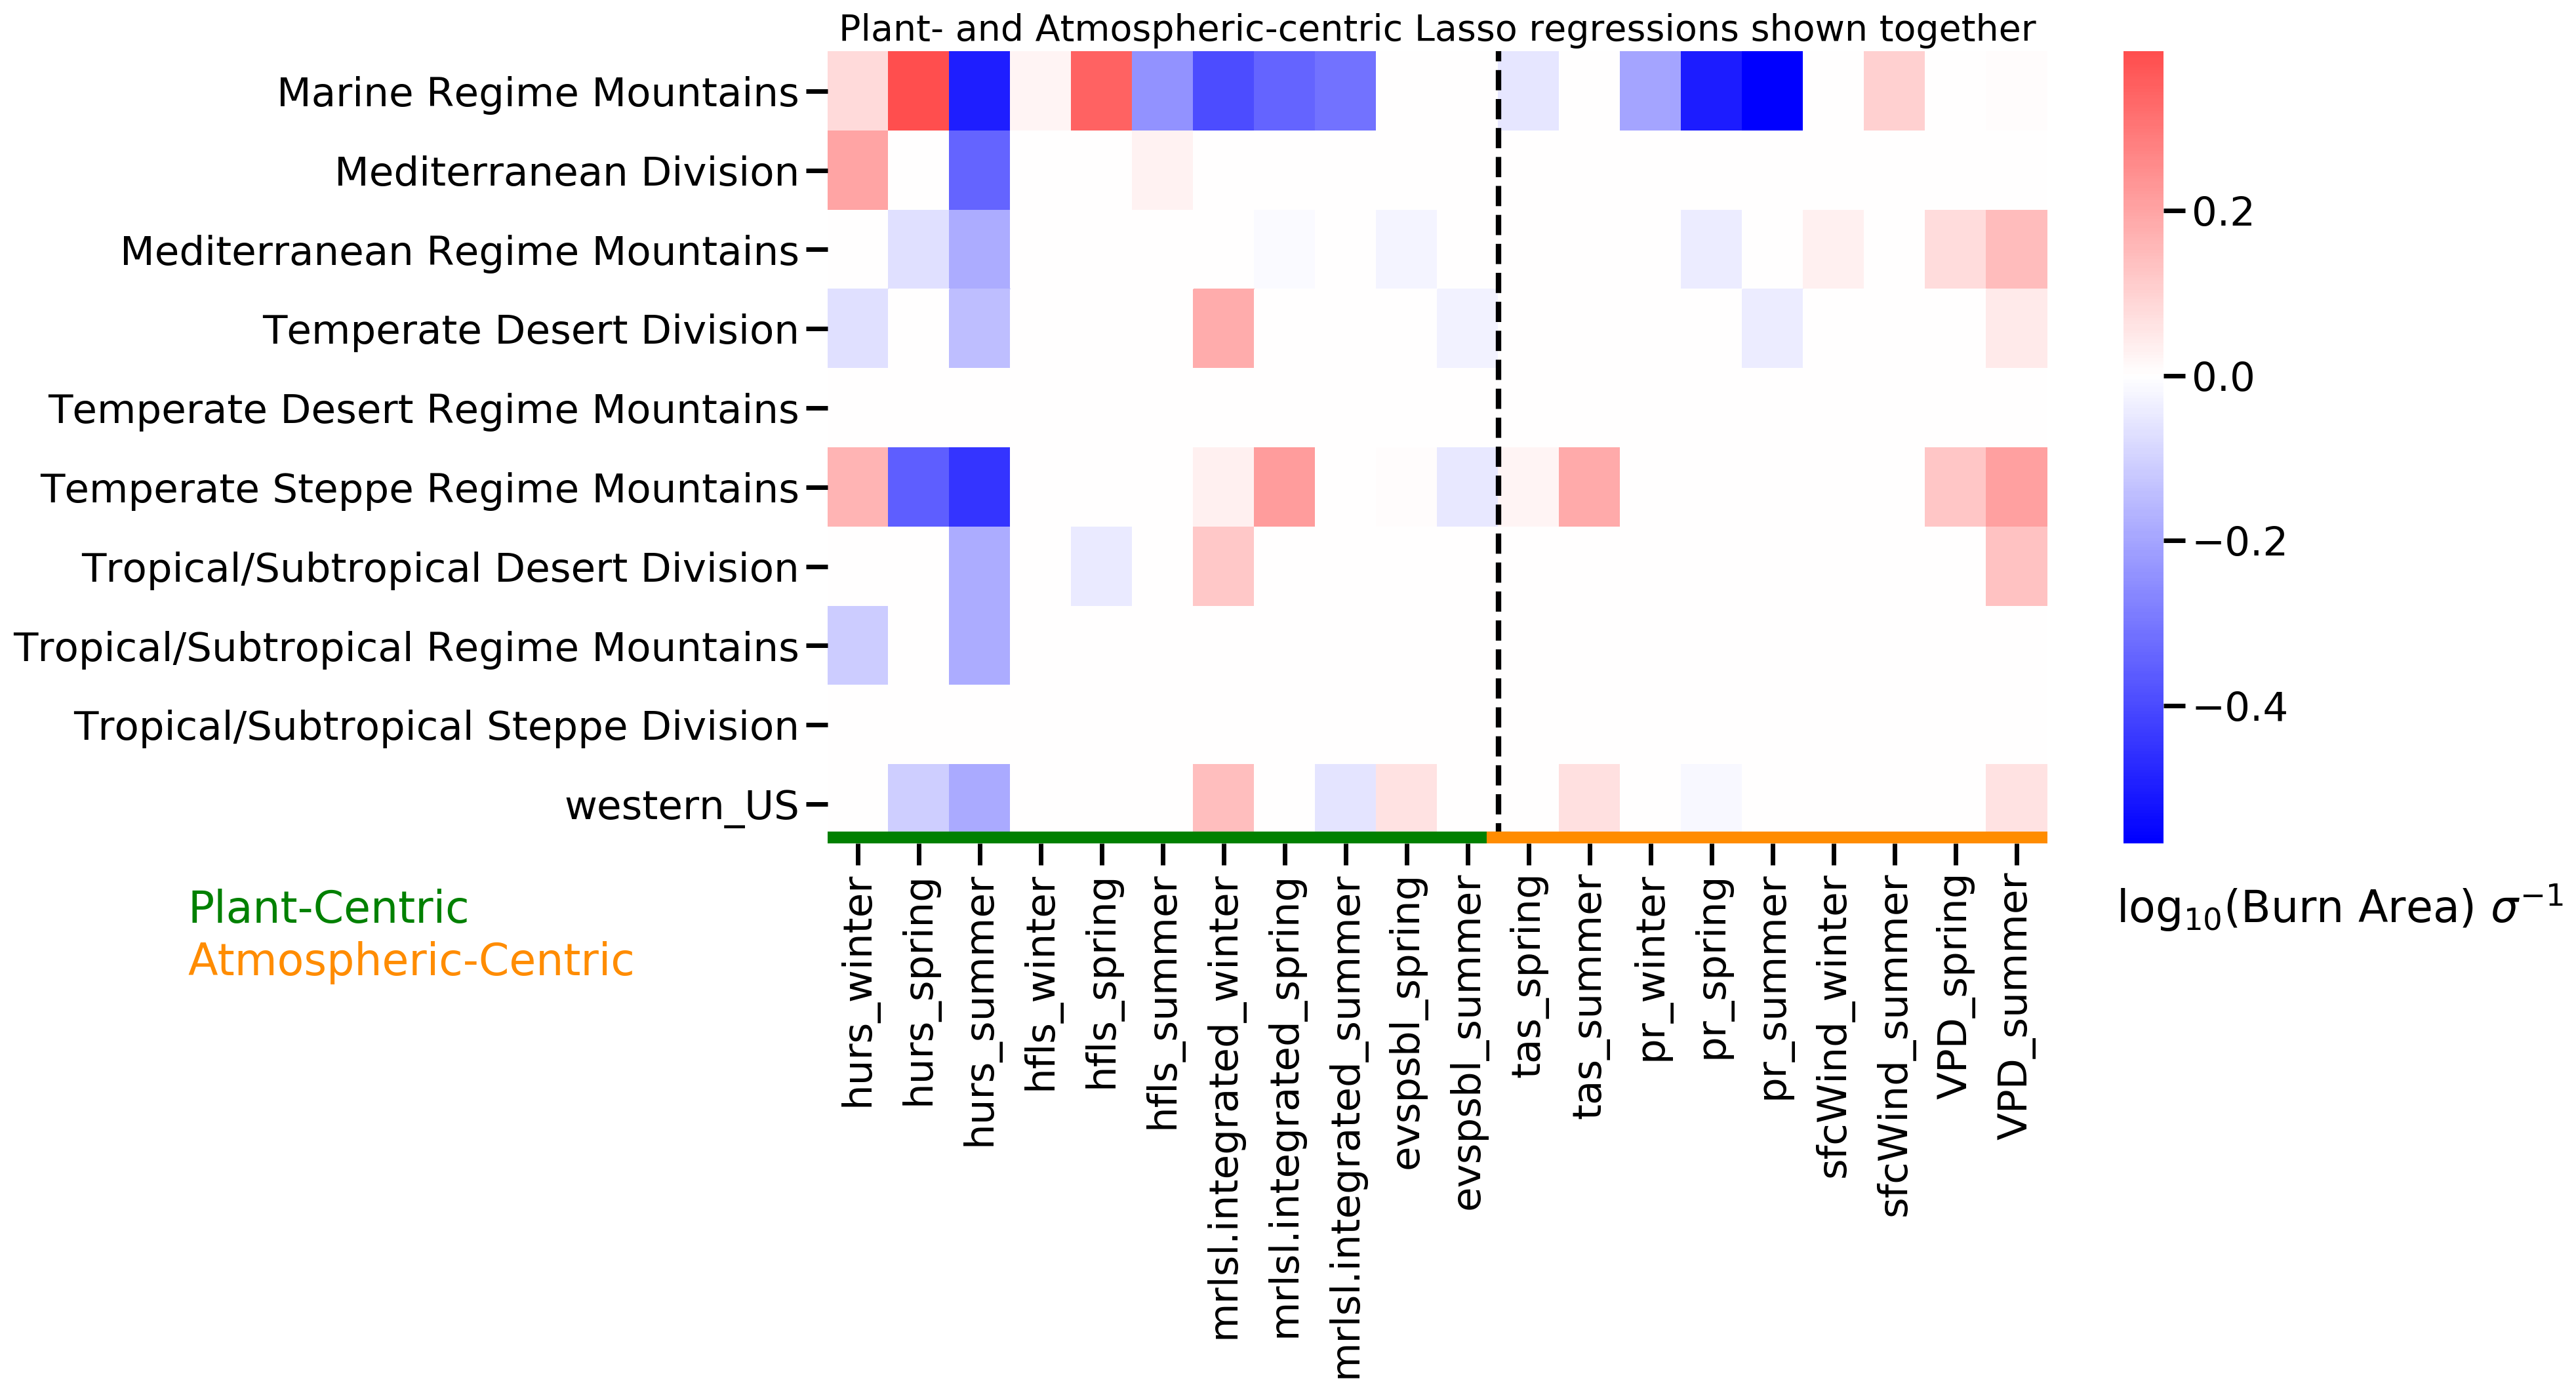

In [16]:
with sns.plotting_context("poster") :
    # TODO: Show r-squared on this plot 
    f, ax = plt.subplots(figsize=(15, 8), dpi=200)
    ax1 = sns.heatmap(lasso_combined_coefs, center=0, cmap="bwr")
    
    #ax1.set_xticklabels(labels=lasso_combined_coefs.columns , rotation=30)
    
    ax1.set(xlabel="", ylabel="")
    ax1.axes.set_title("Plant- and Atmospheric-centric Lasso regressions shown together",fontsize=20)
    f.text(x=0.78, y=.05, s="log$_{10}$(Burn Area) $\sigma^{-1}$")
    
    ax1.axvline(x=11., linewidth=3, color="k", linestyle="--")
    ax1.axhline(y=10, xmin=0, xmax=11/20., color="green", linewidth=13)
    ax1.axhline(y=10, xmin=11/20., xmax=1., c="darkorange", linewidth=13)
    
    f.text(x=-0.2, y=.05, s="Plant-Centric", color="green")
    f.text(x=-0.2, y=.00, s="Atmospheric-Centric", color="darkorange")
    
    plt.savefig(os.path.join(dataDir, "lasso_combined_coefs_heat_matrix.png"), bbox_inches='tight')
    plt.show()

In [17]:
R2_df = pd.DataFrame(divisions[["OLS_r2","lasso_r2", "atmos_r2", "plant_r2"]])
R2_df.rename(columns={"OLS_r2":"OLS", 
                      "lasso_r2":"Lasso All",
                      "atmos_r2":"Lasso Atmospheric",
                      "plant_r2":"Lasso Plant"}, 
                      inplace=True)
R2_df

OLS  Lasso All  Lasso Atmospheric  \
division                                                                        
Marine Regime Mountains                0.891559   0.711095           0.533616   
Mediterranean Division                 0.755633   0.000000           0.000000   
Mediterranean Regime Mountains         0.930708   0.346831           0.392696   
Temperate Desert Division              0.956162   0.369688           0.133031   
Temperate Desert Regime Mountains      0.725991   0.000000           0.000000   
Temperate Steppe Regime Mountains      0.943635   0.689863           0.697454   
Tropical/Subtropical Desert Division   0.878126   0.367346           0.217156   
Tropical/Subtropical Regime Mountains  0.563620   0.000000           0.000000   
Tropical/Subtropical Steppe Division   0.632313   0.000000           0.000000   

                                       Lasso Plant  
division                                            
Marine Regime Mountains                   0.612774  
Mediterranean Division                    0.263585  
Mediterranean Regime Mountains            0.421864  
Temperate Desert Division                 0.423100  
Temperate Desert Regime Mountains         0.000000  
Temperate Steppe Regime Mountains         0.764373  
Tropical/Subtropical Desert Division      0.369763  
Tropical/Subtropical Regime Mountains     0.101611  
Tropical/Subtropical Steppe Division      0.000000

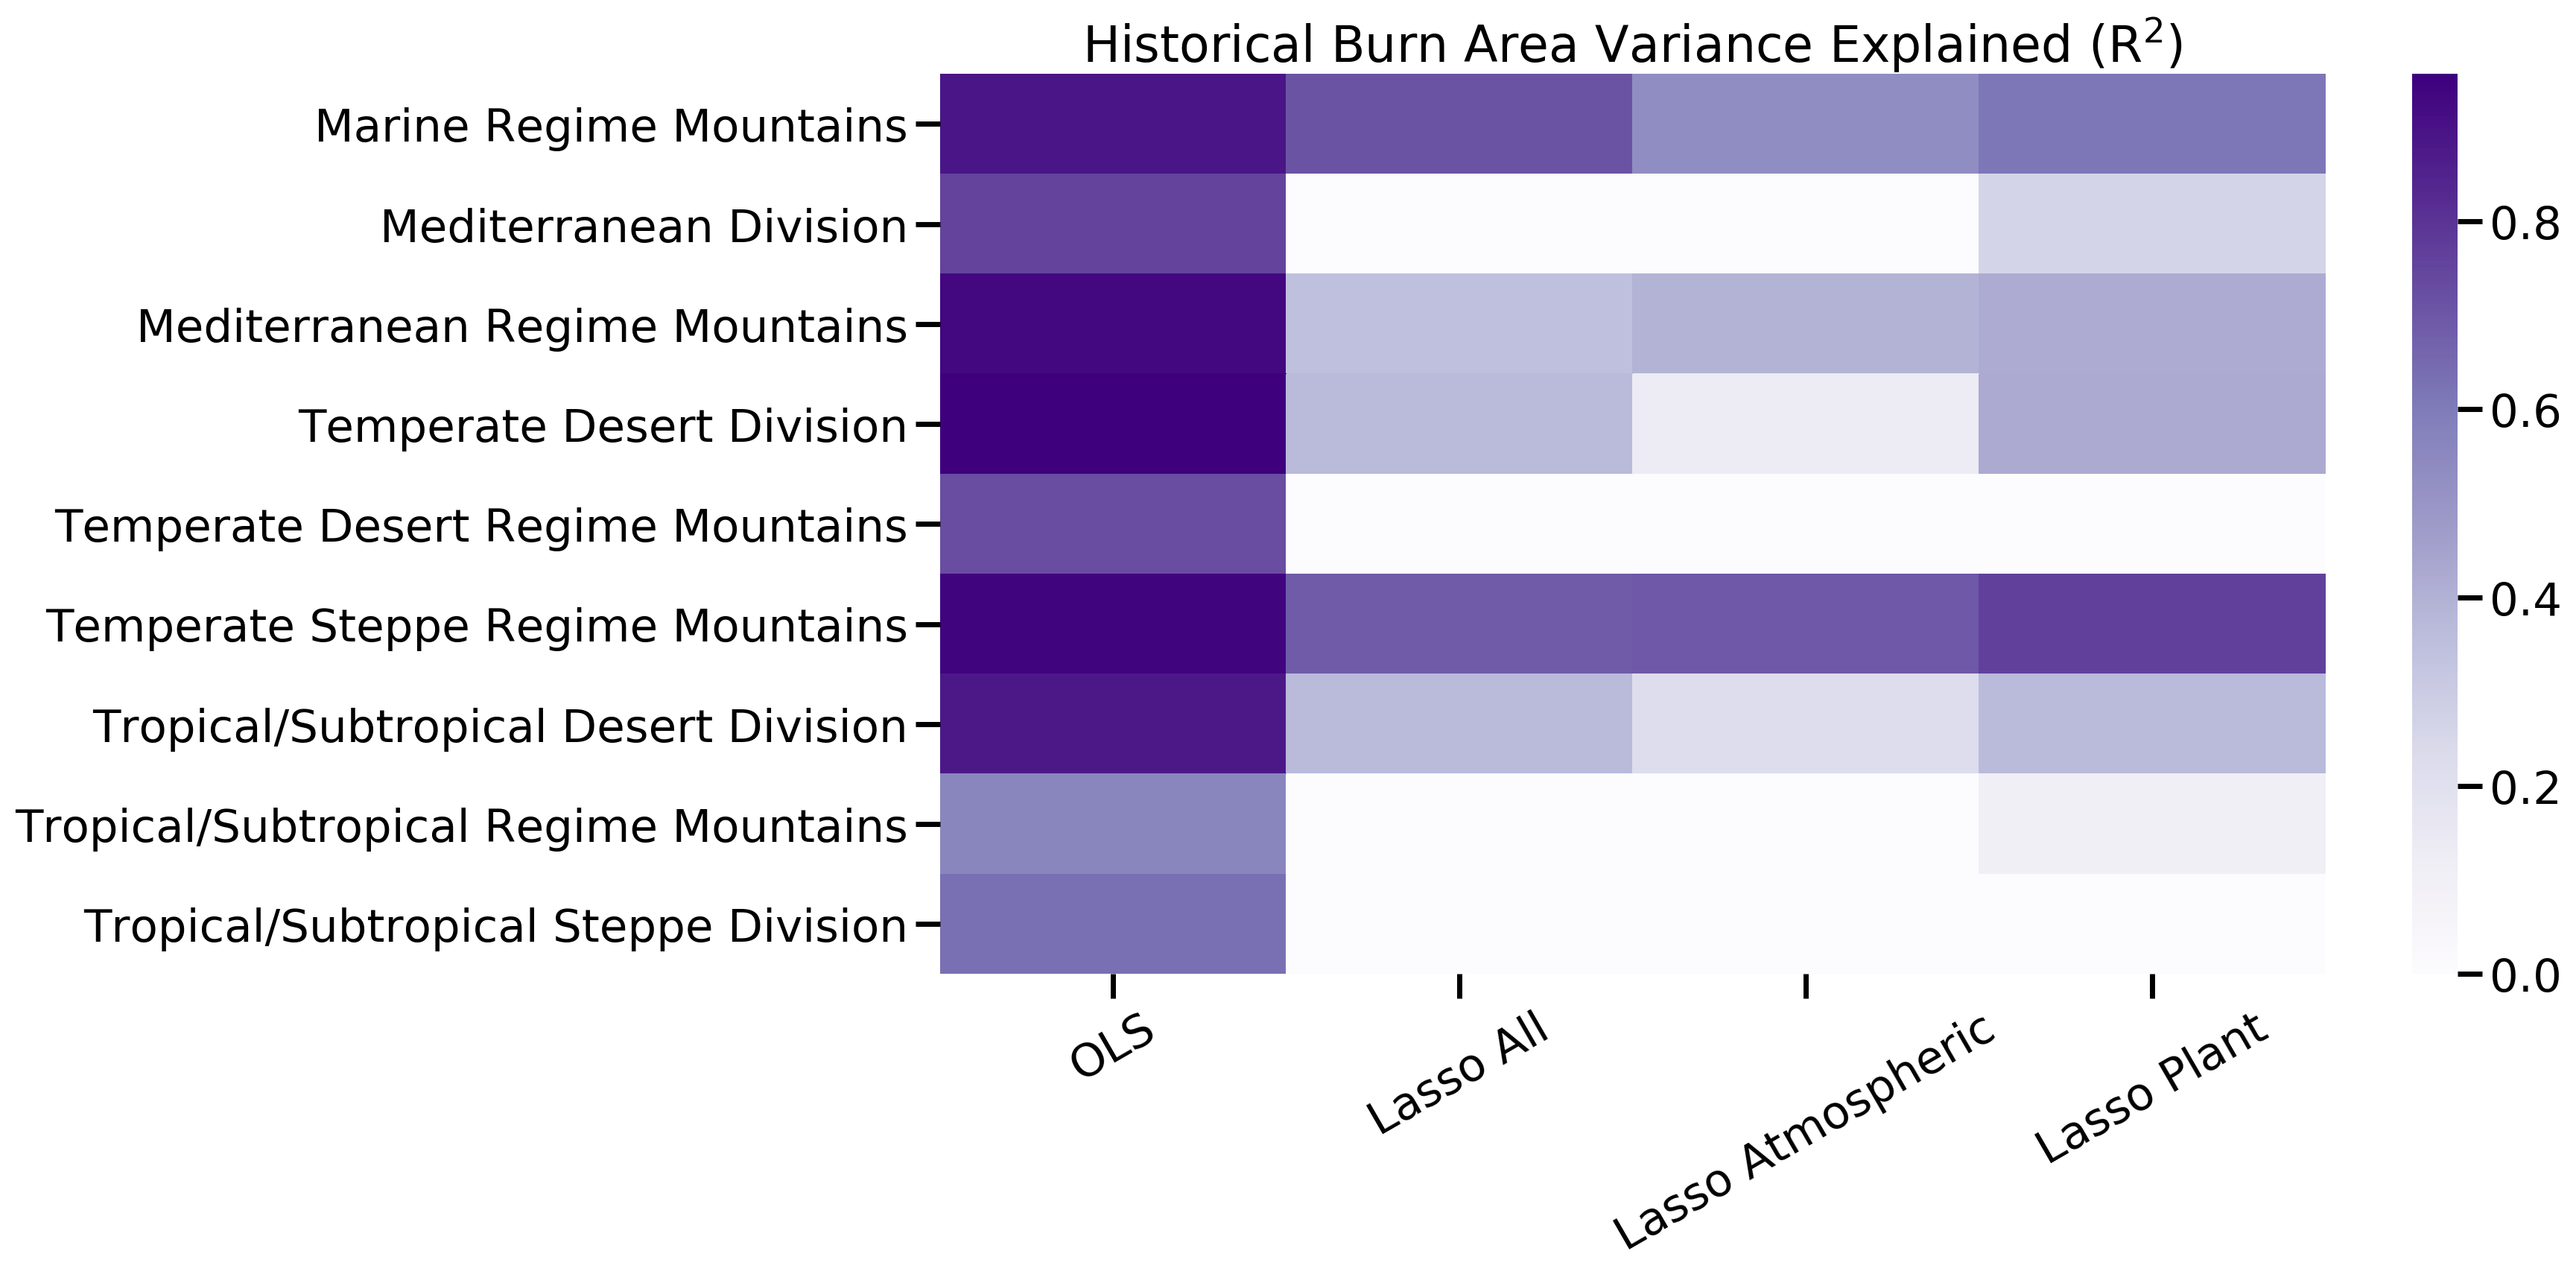

In [18]:
with sns.plotting_context("poster") :
    f, ax = plt.subplots(figsize=(15, 8), dpi=200)
    ax1 = sns.heatmap(R2_df, cmap="Purples")
    ax1.set(xlabel="", ylabel="", title="Historical Burn Area Variance Explained (R$^{2}$)")
    ax1.set_xticklabels(labels=R2_df.columns , rotation=30)
    #ax1.collections[0].colorbar.set_label("R$^{2}$")
    plt.savefig(os.path.join(dataDir,"models_variance_explained_heatmap.png"),  bbox_inches='tight')

Make all three of the above plots work together below. 

# Show predictor importance and variance
- NOTE: lasso_combined_coefs does not have columns in the same order as Z_dict of era-interim, so make sure that you account for that when reading data in function below. 

In [19]:
def get_cmip5_Z_dict(regression_name, rcp) :
    """
    Function for loading pickled CMIP5 dictionaries. Returns 
    dictionary associated with the specified file name. 
    """
    
    # Get the CMIP5 features expressed in terms of historical variance "Z_dict"
    # or their raw values averaged in a region ""
    f = regression_name + "_Z_cmip_" + rcp + '_dict.obj'
    print("Getting " + f)
    with open(os.path.join(dataDir, f), 'rb') as fp:
        Z_cmip_dict = pickle.load(fp)
    return Z_cmip_dict 

#### Setup a color dictionary for consistent colors for predictors 

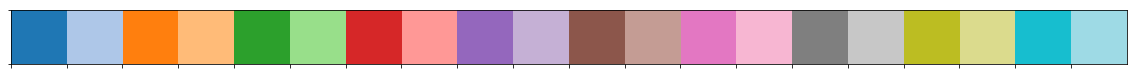

In [20]:
lasso_combined_coefs.shape[1]
sns.palplot(sns.color_palette("tab20"))

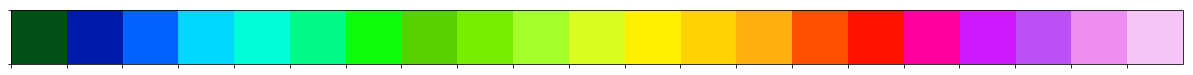

In [21]:
sns.palplot(sns.color_palette("gist_ncar", 21, 1))

### Make a custom legend and color scheme

In [22]:
# first, a color scheme 
cols = sns.color_palette("tab20")
color_dict = {}
for i in range(lasso_combined_coefs.shape[1]) :
    color_dict[lasso_combined_coefs.columns.values[i]] = cols[i]
color_dict

{'hurs_winter': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'hurs_spring': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'hurs_summer': (1.0, 0.4980392156862745, 0.054901960784313725),
 'hfls_winter': (1.0, 0.7333333333333333, 0.47058823529411764),
 'hfls_spring': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'hfls_summer': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'mrlsl.integrated_winter': (0.8392156862745098,
  0.15294117647058825,
  0.1568627450980392),
 'mrlsl.integrated_spring': (1.0, 0.596078431372549, 0.5882352941176471),
 'mrlsl.integrated_summer': (0.5803921568627451,
  0.403921568627451,
  0.7411764705882353),
 'evspsbl_spring': (0.7725490196078432,
  0.6901960784313725,
  0.8352941176470589),
 'evspsbl_summer': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354),
 'tas_spring': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'tas_summer': (0.8901960784313725, 0.466666666

In [23]:
feature = 'hurs_winter'

In [24]:
feature_legend = [] # empty list

# e.g.
# Green dot: Line2D([0], [0], marker='o', color='w', label='plant', markerfacecolor='g', markersize=15),
# Green square: Line2D([0], [0], marker='s', color='w', label='atmos', markerfacecolor='g', markersize=15),
for feature in color_dict.keys() : 
    #print(feature)
    if pd.Series(feature).isin(lasso_plant_coefs.columns)[0] : 
        marker = "o" # Plant marker
    else : 
        marker = "s" # Atmos marker

    fc = color_dict[feature]

    # Set feature attributes to Line2D
    line_feature = Line2D([0], [0], marker=marker, color='w', label=feature, markerfacecolor=fc, markersize=15)
    # Store in list 
    feature_legend.append(line_feature)


In [25]:
def create_scatter_df(div, coef_df, div_Z_dict, y1=2070, y2=2099) :  
    """
    This creates a dataframe that makes for easy plotting and handling of differences
    in feature values from the training period 1984-2016 to years y1:y2. By the definition
    of how we standardize CMIP5 data for, the mean value for all CMIP model feature values
    for 1984-2016 the same as ERA-Interim, thus the difference is zero. The dataframe created
    
    Parameters
    ----------
        div : str, the division (ecoregion) for which a scatter_df will be created. 
        coef_df : pd.DataFrame, of lasso regression coeficients with shape =(n_division, n_features) 
        div_Z_dict : {}, containing different divisions dictionary of CMIP5 model Z (standardized)
                     output for estimating the change. 
        y1 : int, first year of the time period to average. 
        y2 : int, last year of the time period to average. 
        
    """
        
    # Get the division coeficients, only where non-zero, for this division. 
    df = coef_df.loc[div, coef_df.loc[div] != 0 ].copy()

    # Set up the DataFrame to hold information for scatterploting for div
    col_names = ["division", "feature", "feature_N", "feature_type", "coef", 
                 "CMIP5_mean", "CMIP5_std","CMIP5_min", "CMIP5_max"]
    
    df_scatter = pd.DataFrame(index=df.index, columns=col_names)
    df_scatter["division"]  = div
    df_scatter["feature_N"] = len(div_Z_dict.keys()) # models with all features for division 
    df_scatter["feature"]   = df_scatter.index.values.copy()
    df_scatter["coef"]      = df.values.copy()

    for model in div_Z_dict.keys() : 

        # Assign CMIP5 stats where they belong here. 
        Z_cmip = div_Z_dict[model]

        # We want the values for the last 30 years of 21st century
        # TODO: make time period a variable 
        future_mean_sigma = Z_cmip.loc[y1:y2, :].mean() # mean of columns, here variables 

        # Get the future sigma for the variables with non-zero coefs 
        # Add the new column for the data from THIS model 
        df_scatter[model] = future_mean_sigma[df_scatter.index]
            
    # Get the stats on the rows from the model sigma output. This gives the
    # mean of the changes calculated in the for loop above. 
    model_columns = list(div_Z_dict.keys())
    df_scatter.loc[:, "CMIP5_mean"] = df_scatter[model_columns].mean(axis=1).copy()
    df_scatter.loc[:, "CMIP5_std"] = df_scatter[model_columns].std(axis=1).copy()
    df_scatter.loc[:, "CMIP5_min"] = df_scatter[model_columns].min(axis=1).copy()
    df_scatter.loc[:, "CMIP5_max"] = df_scatter[model_columns].max(axis=1).copy()
    
    # Assign feature types
    # TODO: Pass these in
    plant_vars = ['mrlsl.integrated', 'evspsbl', 'hurs', 'hfls'] 
    atmos_vars = ['tas', 'VPD', 'pr', 'sfcWind']       
    
    for i in df_scatter["feature"] : 
        #print(i)
        s = pd.Series(i.split("_")[0]).isin(plant_vars).values
        #print(s)
        if  s : 
            df_scatter.loc[i, "feature_type"] = "Plant-Centric"
        else :
            df_scatter.loc[i, "feature_type"] = "Atmos-Centric"
            
    return df_scatter 

TODO: Remake this figure, capable of showing RCP 4.5 and 8.5 together

In [26]:
def plot_coef_vs_std(div, dataDir, regression_name, df, return_fig=False, rcp="8.5", color_dict='none', y1=2070, y2=2099) :  

    """
    TODO: Description + notes
    """
    
    figure_savename = os.path.join(dataDir, regression_name + "_" + div.replace("/", " ") + "_coefs_vs_rcp"+rcp.replace(".","")+"_std.png")
    title_text = "RCP" +rcp +" CMIP5 $\mu_{"+str(y1)+"-"+str(y2)+"}$ - ERA-Interim $\mu_{1984-2016}$"    
    
    marker_dictionary = {"Plant-Centric":"o",
                         "Atmos-Centric":"s"
                        }
    
    if issubclass(type(color_dict), str) : 
        # No dictionar of colors passed, use defualt cmap
        pal = sns.color_palette("gist_ncar", df.shape[0], 1)
    else : 
        pal = color_dict
    
    ############################
    # Data ready, begin plotting 
    ############################
    if not return_fig :
        fig = plt.figure(dpi=250, figsize=(4, 4))
   
    ax = sns.scatterplot(x="coef", y="CMIP5_mean", hue="feature",
                         style="feature_type", data=df, 
                         markers=marker_dictionary, s=45,
                         palette=pal)
    
    #ax.axis('off')
    #ax.axhline(y=1, color="gray", linestyle="--", linewidth=0.5)
    ax.axhline(y=0, color="k", linestyle="--", linewidth=0.8)
    #ax.axhline(y=-1, color="gray", linestyle="--", linewidth=0.5)

    ax.axvline(x=0, color="k", linestyle="--", linewidth=0.8)
    ax.set(xlabel='Regression Coefficient [log$_{10}$(Burn Area) $\sigma^{-1}$]', 
           ylabel='$\Delta$  [ERA-Interim$\sigma$$_{1984-2016}$]')
    
    if not return_fig :
        ax.legend( bbox_to_anchor=(1,1.), title="", frameon=False)
        plt.title(label=title_text, fontsize=9)
        plt.suptitle(div)
    else :
        plt.title(label=div + " RCP" + rcp, fontsize=12)
        # remove spines for neat plots. 
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
    
    # Calculate the error (spread extent) bars for each variable
    error = np.zeros(shape=(2, len(df['CMIP5_min'])))
    lower_ext = df["CMIP5_mean"] - df['CMIP5_min']  # how far below 
    upper_ext = df['CMIP5_max'] - df["CMIP5_mean"]  # how far above 
    error[0][:] = np.array(lower_ext)
    error[1][:] = np.array(upper_ext)
    ax.errorbar(df["coef"], df["CMIP5_mean"], fmt=' ', 
                yerr=error, capsize=2, linewidth=0.8, color="k")
    
    # TODO: consider adding Standard dev
    #error = np.zeros(shape=(2, len(df['CMIP5_min'])))
    #lower_ext = df["CMIP5_mean"] - df['CMIP5_std']  # how far below 
    #upper_ext = df['CMIP5_std'] - df["CMIP5_mean"]  # how far above 
    #error[0][:] = np.array(lower_ext)
    #error[1][:] = np.array(upper_ext)
    #ax.errorbar(df["coef"], df["CMIP5_mean"], fmt=' ', 
    #            yerr=error, capsize=2, linewidth=0.8)
    
    if not return_fig : 
        plt.savefig(figure_savename, bbox_inches='tight')
        plt.close()
    else :
        return ax
    

### plot_coef_vs_std() for lasso_all regressions

In [27]:
lasso_all_Z_cmip_dict = get_cmip5_Z_dict(regression_name='lasso_all', rcp='85')

d = {}

for div in lasso_all_Z_cmip_dict.keys() : 
    print(div)
    # Create scatter_df
    df_ = create_scatter_df(div, lasso_all_coefs, lasso_all_Z_cmip_dict[div])
    d[div] = df_
    plot_coef_vs_std(div, dataDir, "lasso_all", df_)

Getting lasso_all_Z_cmip_85_dict.obj
Marine Regime Mountains
Temperate Desert Division
Temperate Steppe Regime Mountains
Tropical/Subtropical Desert Division
Tropical/Subtropical Steppe Division


No handles with labels found to put in legend.


Tropical/Subtropical Regime Mountains
Mediterranean Regime Mountains


No handles with labels found to put in legend.


Mediterranean Division


No handles with labels found to put in legend.


Temperate Desert Regime Mountains
western_US


### plot_coef_vs_std() for lasso_combined regressions by merging plant and atmos
#### - TODO: Make this multipanel with a shared y or x axis for the regions of interest. 

In [28]:
# RCP8.5
lasso_plant_Z_cmip85_dict = get_cmip5_Z_dict(regression_name='lasso_plant', rcp='85')
lasso_atmos_Z_cmip85_dict = get_cmip5_Z_dict(regression_name='lasso_atmos', rcp='85')
# RCP4.5
lasso_plant_Z_cmip45_dict = get_cmip5_Z_dict(regression_name='lasso_plant', rcp='45')
lasso_atmos_Z_cmip45_dict = get_cmip5_Z_dict(regression_name='lasso_atmos', rcp='45')

Getting lasso_plant_Z_cmip_85_dict.obj
Getting lasso_atmos_Z_cmip_85_dict.obj
Getting lasso_plant_Z_cmip_45_dict.obj
Getting lasso_atmos_Z_cmip_45_dict.obj


In [29]:
scatter_df_85_dict = {}
scatter_df_45_dict = {}

for div in lasso_all_Z_cmip_dict.keys() : 
    
    print(div)
    # RCP 8.5
    df_1 = create_scatter_df(div, lasso_plant_coefs, lasso_plant_Z_cmip85_dict[div])
    df_2 = create_scatter_df(div, lasso_atmos_coefs, lasso_atmos_Z_cmip85_dict[div])
    df_scatter_85 = pd.concat([df_1, df_2], axis=0, sort=False)
    # Plot
    plot_coef_vs_std(div,  dataDir, "lasso_combined", df_scatter_85, False, "8.5", color_dict) 
    # Store the data associated with the plot 
    scatter_df_85_dict[div] = df_scatter_85
    
    # RCP 4.5
    df_1 = create_scatter_df(div, lasso_plant_coefs, lasso_plant_Z_cmip45_dict[div])
    df_2 = create_scatter_df(div, lasso_atmos_coefs, lasso_atmos_Z_cmip45_dict[div])
    df_scatter_45 = pd.concat([df_1, df_2], axis=0, sort=False)
    # Plot
    plot_coef_vs_std(div,  dataDir, "lasso_combined", df_scatter_45, False, "4.5", color_dict) 
    # Save plotted data 
    scatter_df_45_dict[div] = df_scatter_45    


Marine Regime Mountains
Temperate Desert Division
Temperate Steppe Regime Mountains
Tropical/Subtropical Desert Division
Tropical/Subtropical Steppe Division
Tropical/Subtropical Regime Mountains
Mediterranean Regime Mountains
Mediterranean Division


No handles with labels found to put in legend.


Temperate Desert Regime Mountains


No handles with labels found to put in legend.


western_US


### Show the scatterpots for select regions on a common axis

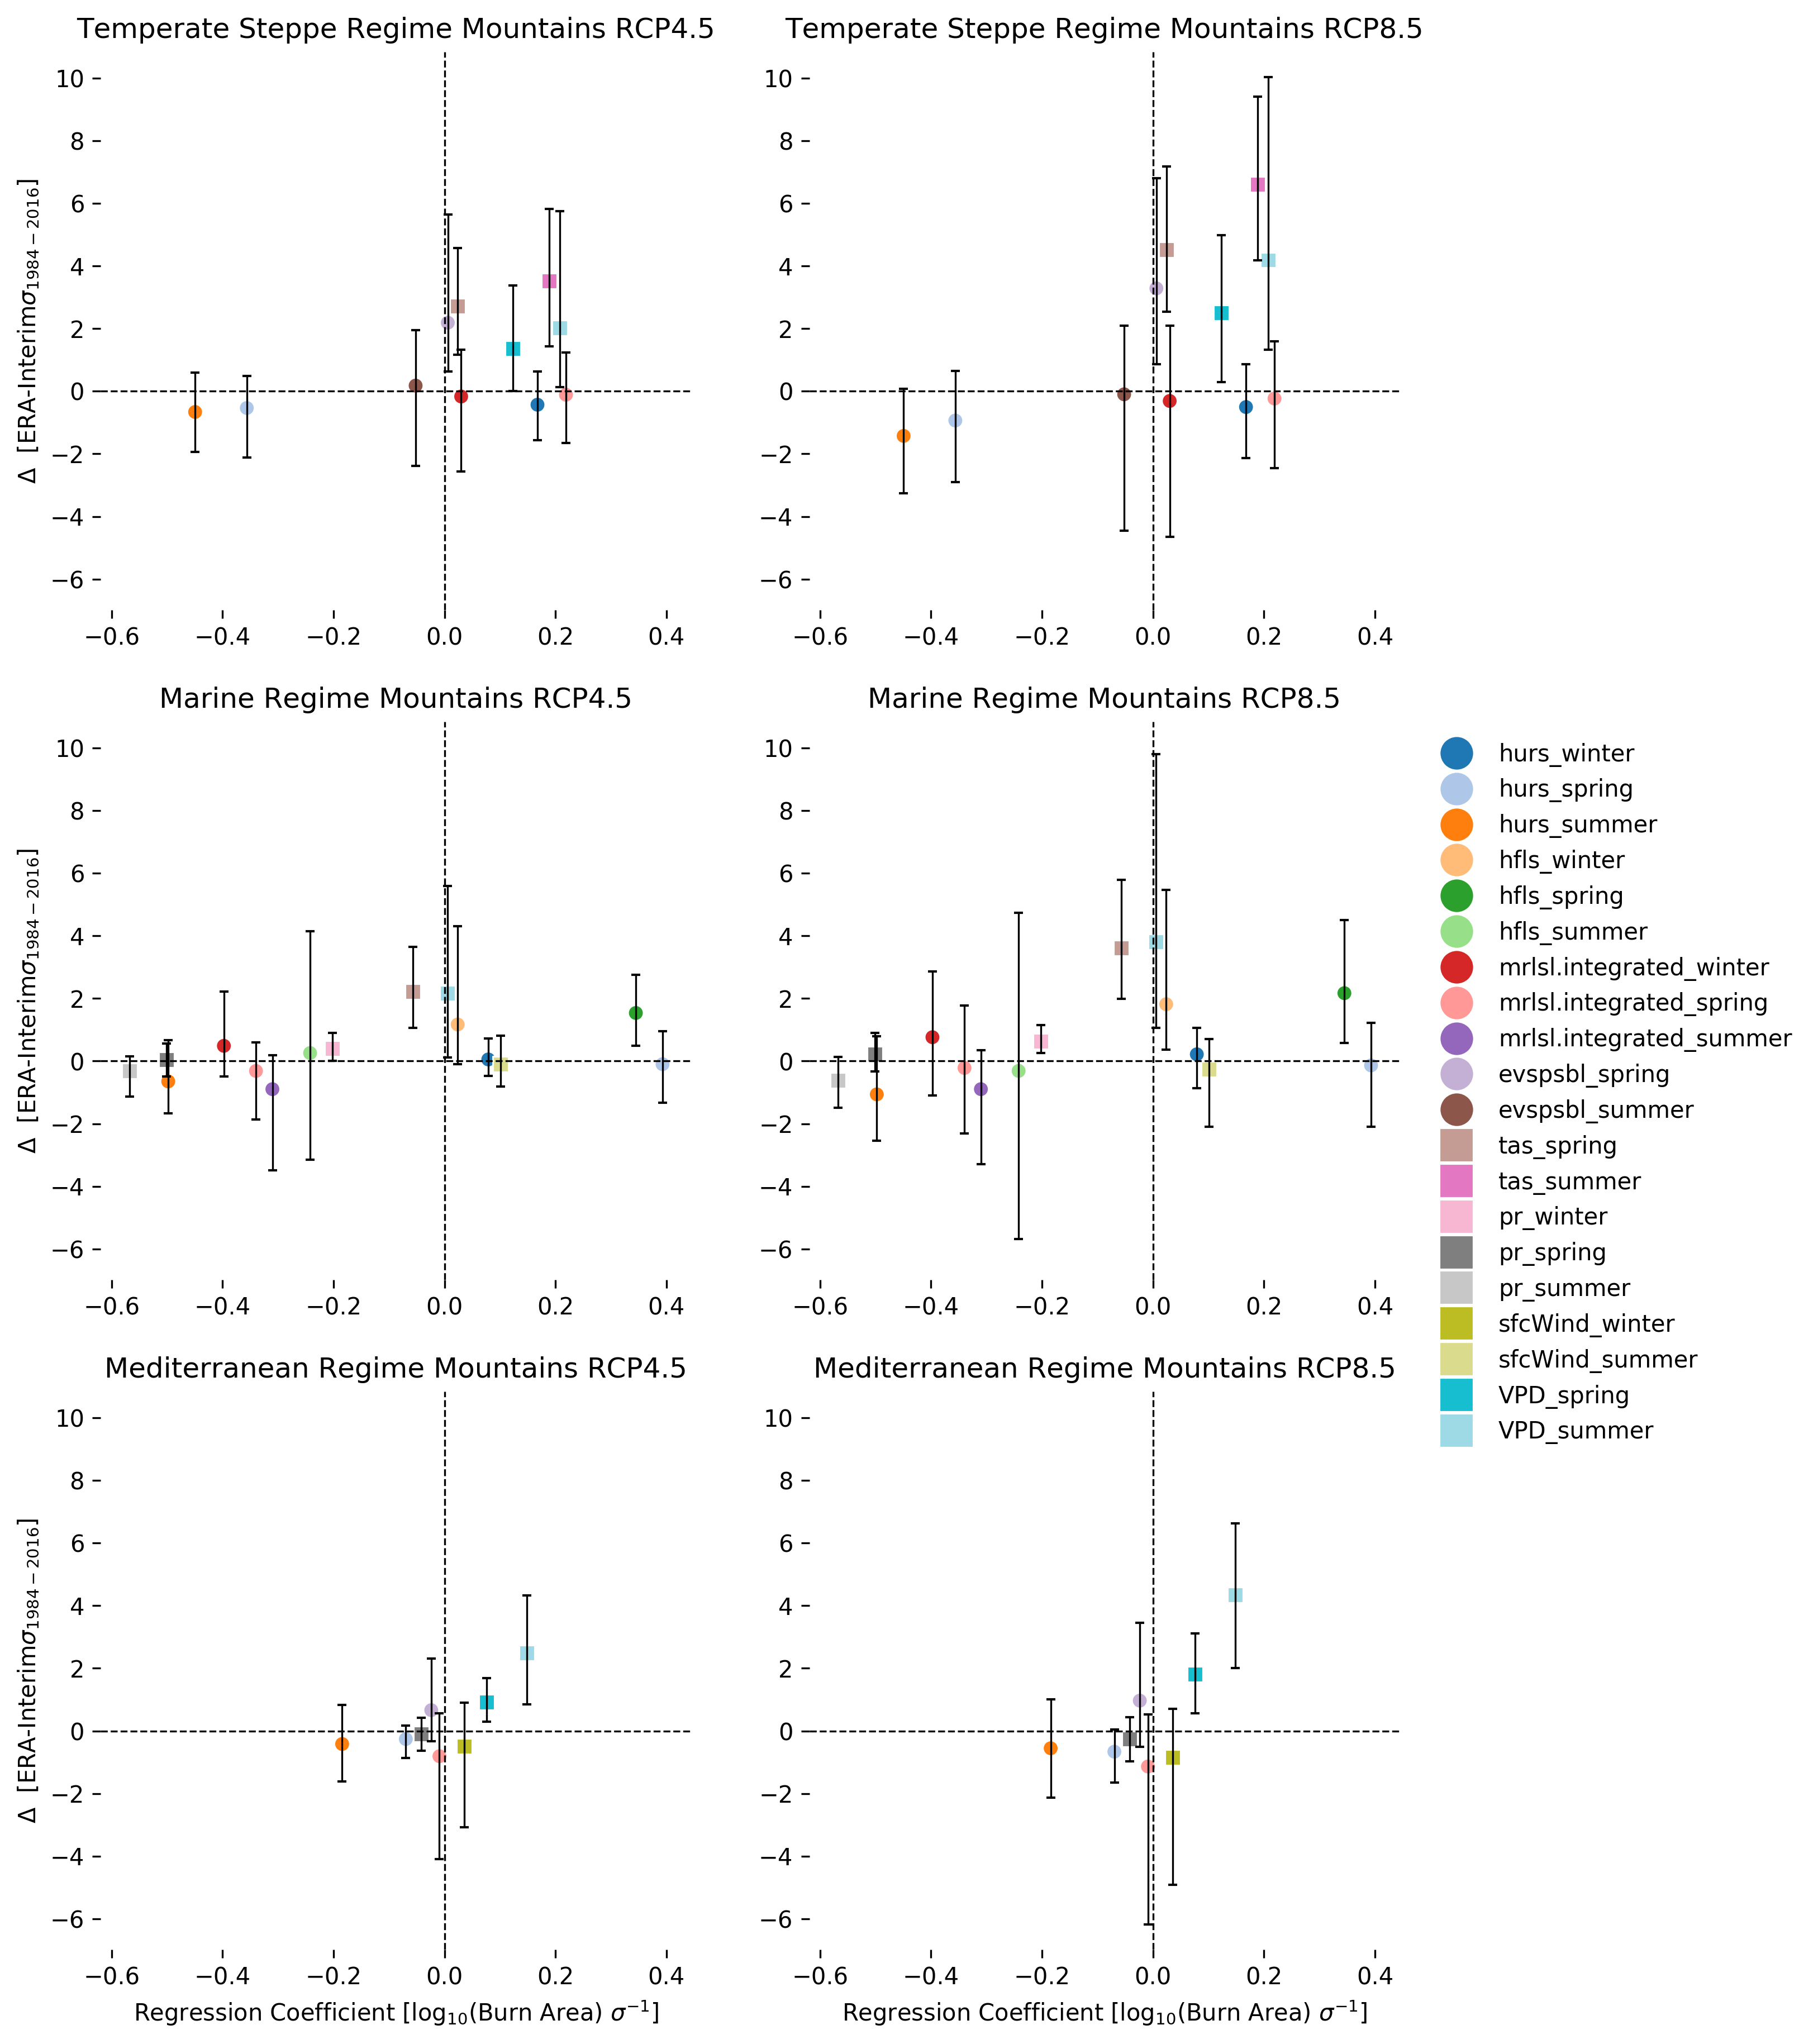

In [30]:
fig = plt.figure(dpi=300, figsize=(10,15))
plt.subplot(321)
ax1=plot_coef_vs_std("Temperate Steppe Regime Mountains", dataDir, "lasso_combined", 
                     scatter_df_45_dict["Temperate Steppe Regime Mountains"], 
                     return_fig=True, rcp="4.5", color_dict=color_dict)

plt.subplot(322, sharey=ax1, sharex=ax1)
ax2=plot_coef_vs_std("Temperate Steppe Regime Mountains", dataDir, "lasso_combined", 
                     scatter_df_85_dict["Temperate Steppe Regime Mountains"], 
                     return_fig=True, rcp="8.5", color_dict=color_dict)

plt.subplot(323, sharey=ax1, sharex=ax1)
ax3=plot_coef_vs_std("Marine Regime Mountains", dataDir, "lasso_combined", 
                     scatter_df_45_dict["Marine Regime Mountains"], 
                     return_fig=True, rcp="4.5", color_dict=color_dict)

plt.subplot(324, sharey=ax1, sharex=ax1)
ax4=plot_coef_vs_std("Marine Regime Mountains", dataDir, "lasso_combined", 
                     scatter_df_85_dict["Marine Regime Mountains"], 
                     return_fig=True, rcp="8.5", color_dict=color_dict)

plt.subplot(325, sharey=ax1, sharex=ax1)
ax5=plot_coef_vs_std("Mediterranean Regime Mountains", dataDir, "lasso_combined", 
                     scatter_df_45_dict["Mediterranean Regime Mountains"], 
                     return_fig=True, rcp="4.5", color_dict=color_dict)

plt.subplot(326, sharey=ax1, sharex=ax1)
ax6=plot_coef_vs_std("Mediterranean Regime Mountains", dataDir, "lasso_combined", 
                     scatter_df_85_dict["Mediterranean Regime Mountains"], 
                     return_fig=True, rcp="8.5", color_dict=color_dict)

# Remove all individual legends
ax1.legend_.remove()
ax2.legend_.remove()
ax3.legend_.remove()
ax4.legend_.remove()
ax5.legend_.remove()
ax6.legend_.remove()

# Do not show xaxis label for the top two rows
ax1.xaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)
ax3.xaxis.label.set_visible(False)
ax4.xaxis.label.set_visible(False)

# Keep ylabel for only the left plots 1,3,5
ax2.yaxis.label.set_visible(False)
ax4.yaxis.label.set_visible(False)
ax6.yaxis.label.set_visible(False)

plt.subplots_adjust(hspace=0.2, wspace=0.2)


ax4.legend(handles=feature_legend)
# Handle the legend
leg = ax4.get_legend()
# [left, bottom, width, height]
leg.set_bbox_to_anchor((0.2, 1, 1.5, 0.0))
leg.set_label(divisions.division)
leg.set_frame_on(False)

plt.savefig(os.path.join(dataDir, "scatter_beta.png"), format='png', bbox_inches="tight")
plt.show()

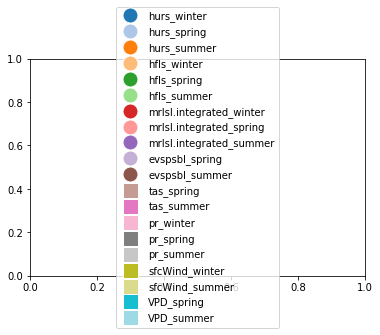

In [184]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='b', lw=4, label='Line'),
                   Line2D([0], [0], marker='o', color='w', label='plant',
                          markerfacecolor='g', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='atmos',
                          markerfacecolor='g', markersize=15),
                   Patch(facecolor='orange', edgecolor='r', label='Color Patch')]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=feature_legend, loc='center')

plt.show()

In [159]:
legend_elements

# Show these data together, using scatter, boxplots, & swarmplots

In [95]:
def make_delta_mean_df(df, rcp="8.5") :
    """
    Parameters
    ----------
        df : scatter df 
    """
    
    # Column attributes to describe the delta mean (sigma) values 
    value = []
    feature = []
    feature_type = [] 
    coef = []
    models = []
    feature_N = []
    division = []
    
    model_names = df.columns[9:].values
    variables = np.unique(df.index.values)

    #print(model_names)
    #print(variables)
    
    for var in variables :          # loop through features mean change 
        for model in model_names :  # for a given model

            value.append(df.loc[var, model])
            feature.append(var)
            feature_type.append(df.loc[var, "feature_type"])
            coef.append(df.loc[var, "coef"])
            division.append(df.loc[var, "division"])
            models.append(model)
            feature_N.append(df.loc[var, "feature_N"])
            
    coef = np.array(coef)
    sign = np.chararray((len(coef)), unicode=True)
    sign[:] = "- correlation"
    sign[coef > 0] = "+ correlation"
    

    return pd.DataFrame({"delta_mean":value, "feature":feature, 
                         "feature_type":feature_type, "coef":coef, "coef_sign":sign,
                         "division":division, "model":models, "feature_N":feature_N,
                         "rcp":rcp})

In [102]:
l85 = [make_delta_mean_df(scatter_df_85_dict['Marine Regime Mountains'], "8.5"),
       make_delta_mean_df(scatter_df_85_dict['Temperate Steppe Regime Mountains'], "8.5"),
       make_delta_mean_df(scatter_df_85_dict['Mediterranean Regime Mountains'], "8.5")
      ]

l45 = [make_delta_mean_df(scatter_df_45_dict['Marine Regime Mountains'], "4.5"),
       make_delta_mean_df(scatter_df_45_dict['Temperate Steppe Regime Mountains'], "4.5"),
       make_delta_mean_df(scatter_df_45_dict['Mediterranean Regime Mountains'], "4.5")
      ]

df_85_delta_mean = pd.concat(l85, axis=0, sort=False, ignore_index=True)
df_45_delta_mean = pd.concat(l45, axis=0, sort=False, ignore_index=True)

In [103]:
np.unique(df_85_delta_mean.rcp)

array(['8.5'], dtype=object)

# Figure 4

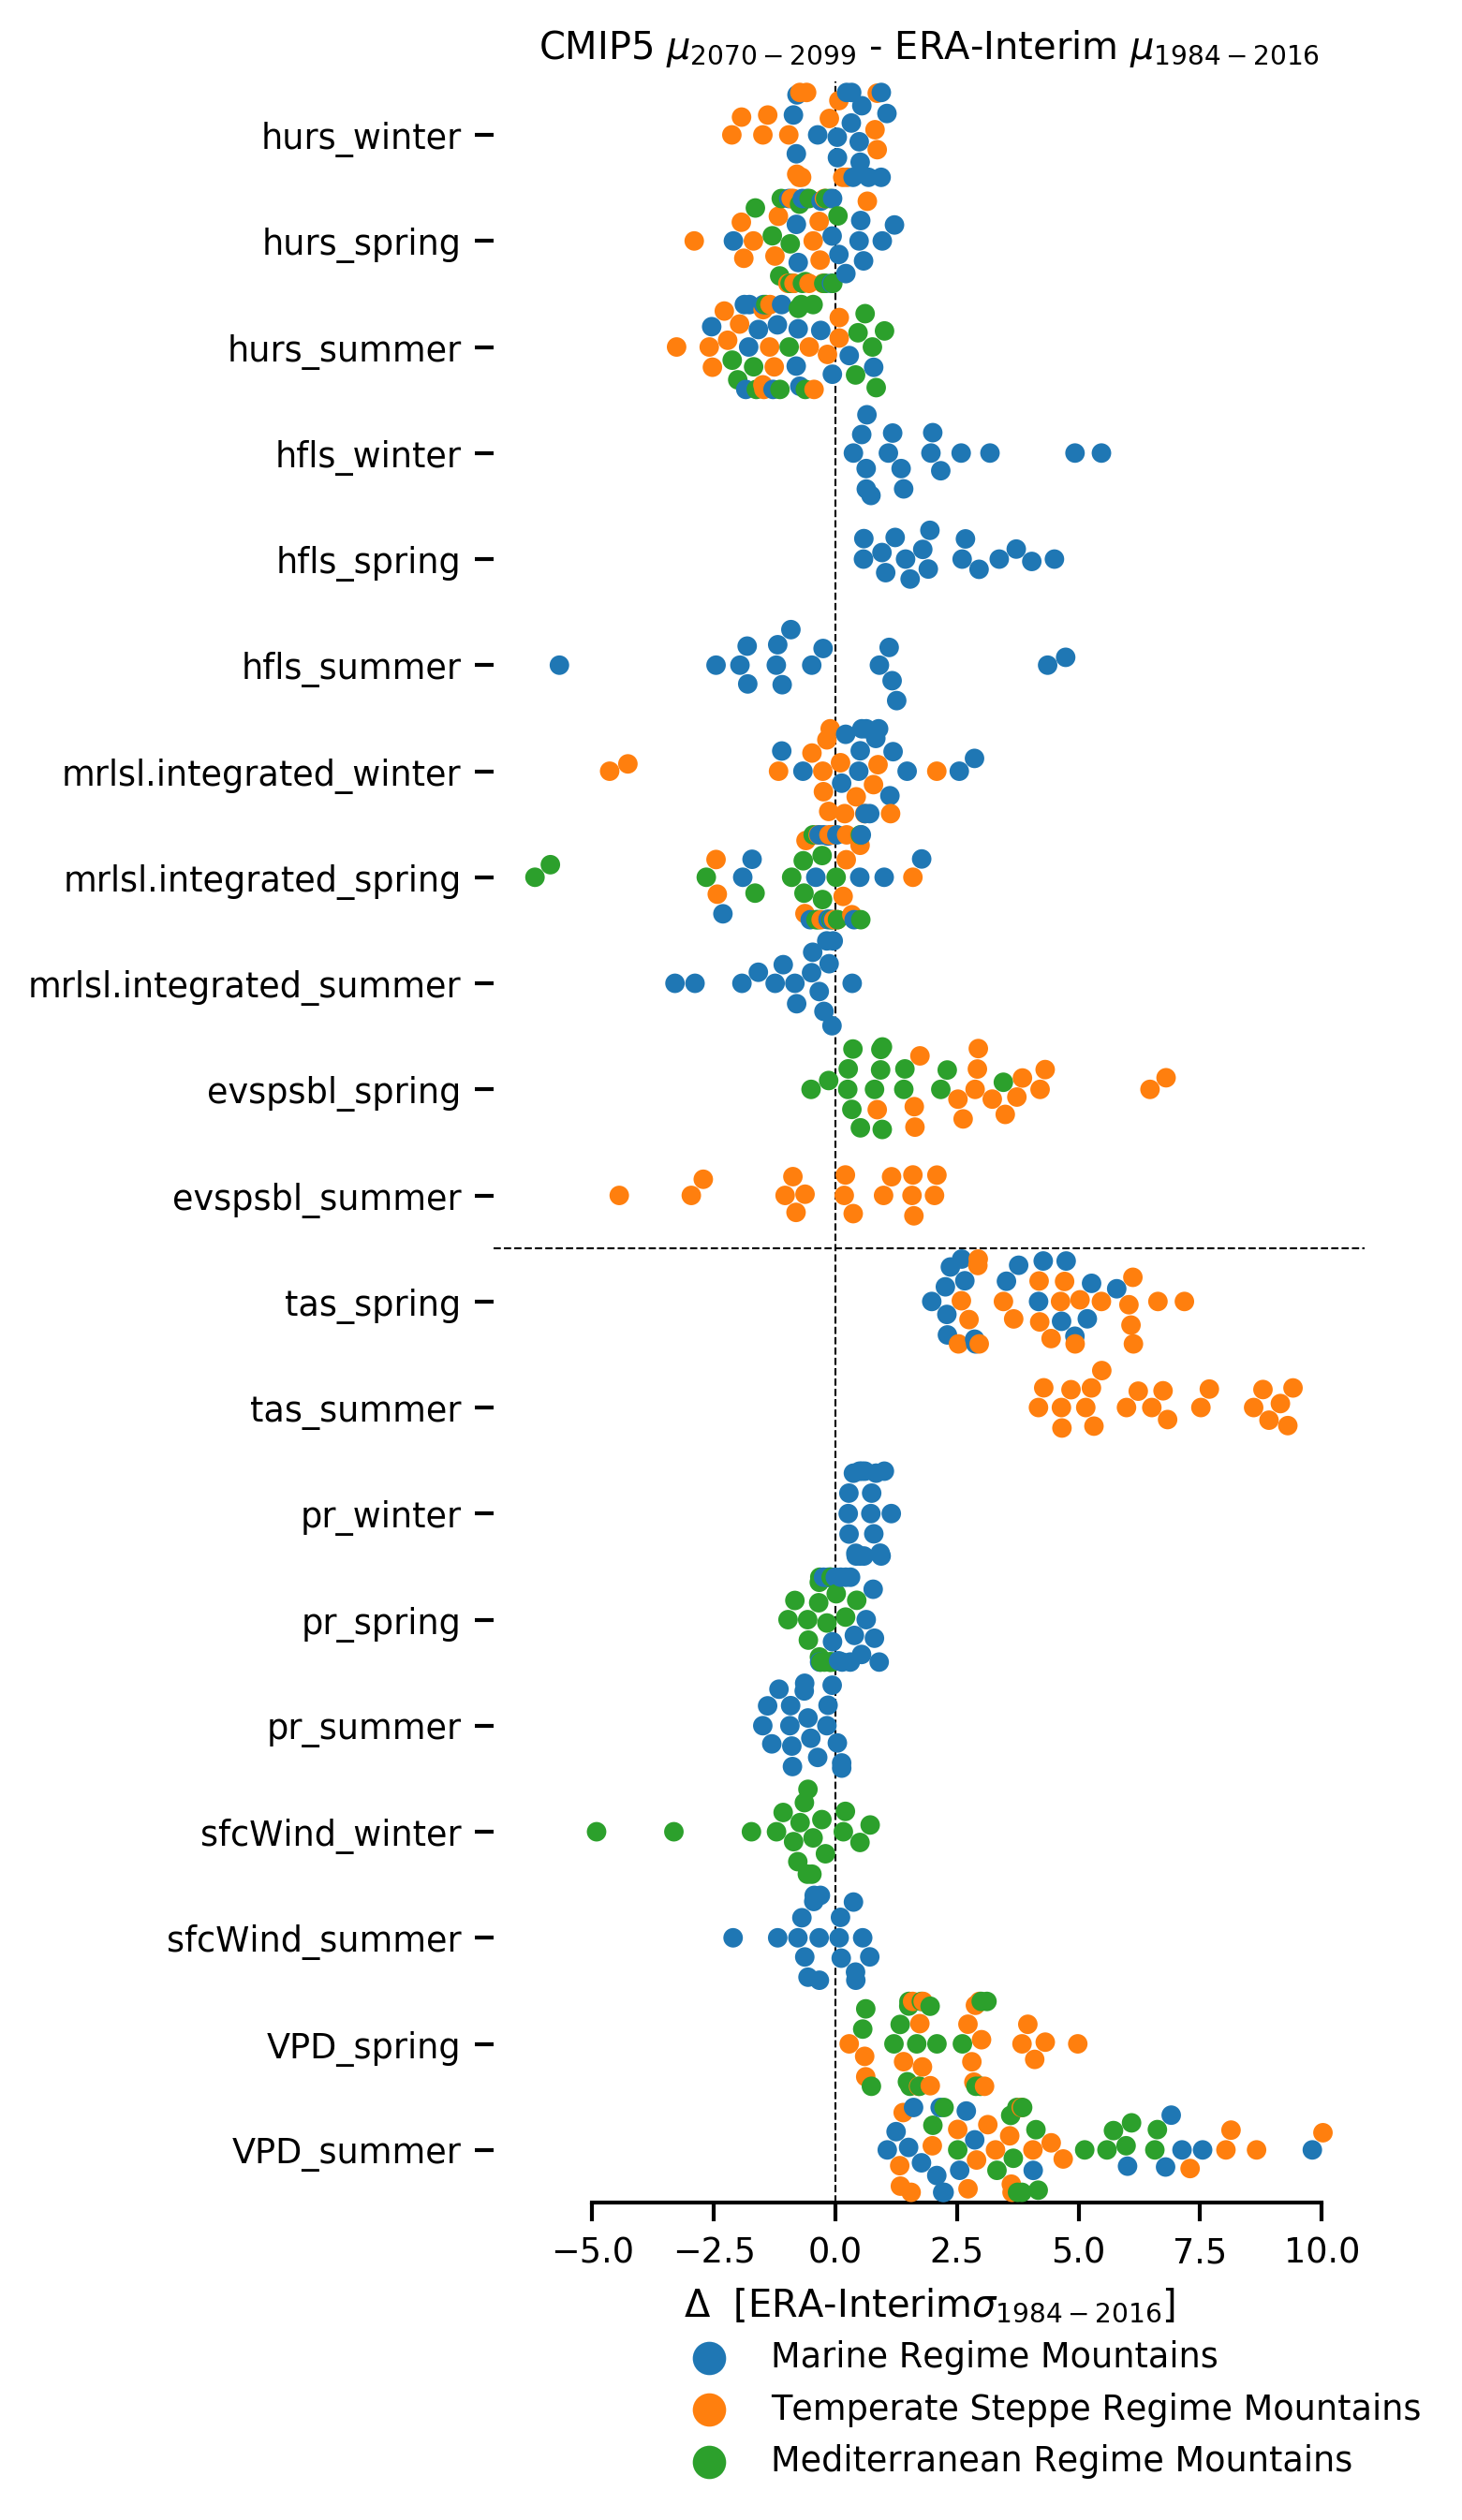

In [39]:
with sns.plotting_context("paper") :

    figure_name = "lasso_combined_delta_means_swamplot.png"
    
    # Set the order of the features for the plot 
    
    lasso_combined_coefs.columns.values
    
    # Figure out where to draw the line that separates plants from atmos
    last_plant_index = np.where(lasso_combined_coefs.columns.values == lasso_plant_coefs.columns[-1])[0][0]

    fig = plt.figure(dpi=300, figsize=(4,10))
    ax = sns.swarmplot(y="feature", x="delta_mean", 
                       hue="division", order=lasso_combined_coefs.columns.values,
                       data=df_85_delta_mean)
    # dodge=True, will stack the colors 

    #ax.xaxis.grid(True)
    ax.set(xlabel="$\Delta$  [ERA-Interim$\sigma$$_{1984-2016}$]")
    ax.set(ylabel="")
    sns.despine(trim=True, left=True)

    #plt.xticks(rotation=90)
    plt.axvline(x=0, linestyle="--", color="k", linewidth=0.5)
    plt.axhline(y=(last_plant_index + 0.5) , linestyle="--", color="k", linewidth=0.5)
    
    # To be consistent with the heat map, draw line along feature label with colors
    #ax.axvline(x=0)

    plt.title("CMIP5 $\mu_{2070-2099}$ - ERA-Interim $\mu_{1984-2016}$")

    # Handle the legend
    leg = ax.get_legend()
    # [left, bottom, width, height]
    leg.set_bbox_to_anchor((0.6, 0.45, 0.5, -0.5))
    leg.set_label(divisions.division)
    leg.set_title("")
    leg.set_frame_on(False)

    plt.savefig(os.path.join(dataDir, figure_name),  bbox_inches='tight')

    plt.show()

### Plotting both RCPs together

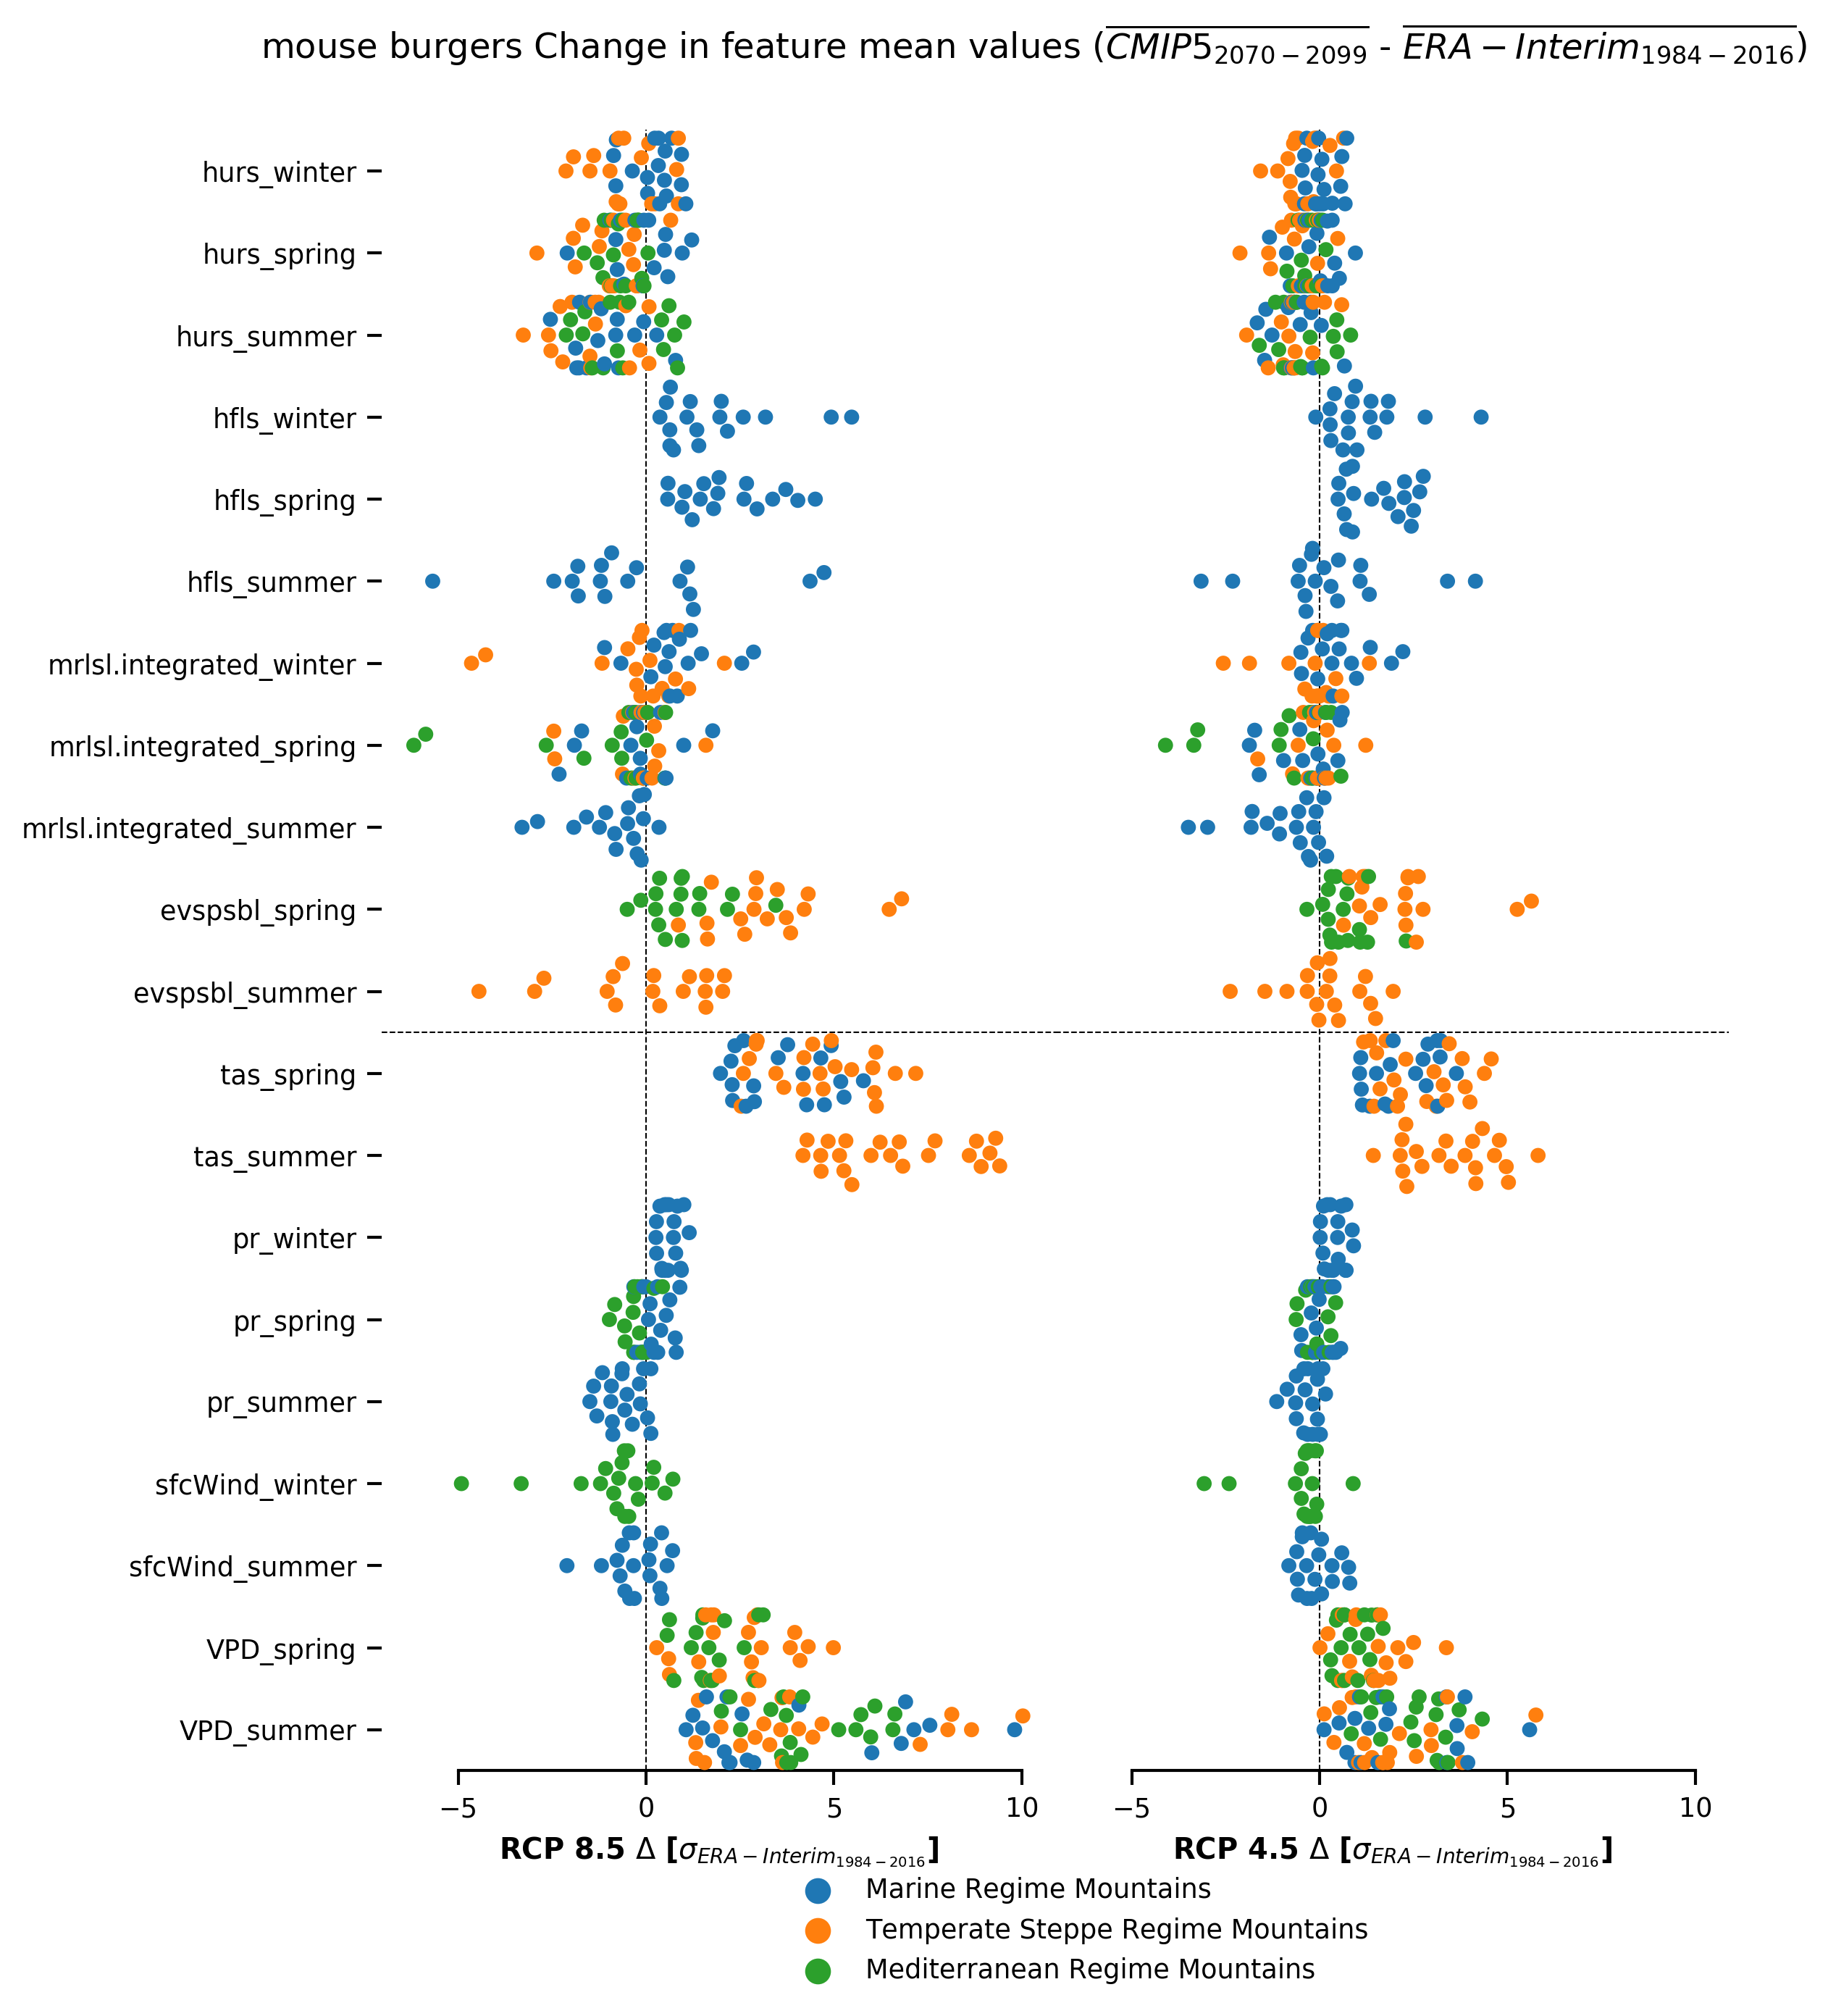

In [80]:
with sns.plotting_context("paper") :

    figure_name = "lasso_combined_delta_means_swamplot.png"
    
    # Set the order of the features for the plot 
    plot_order = lasso_combined_coefs.columns.values    
    # Figure out where to draw the line that separates plants from atmos
    last_plant_index = np.where(lasso_combined_coefs.columns.values == lasso_plant_coefs.columns[-1])[0][0]

    fig = plt.figure(dpi=300, figsize=(8,10))
    
    plt.subplot(1, 2, 1)
    
    ax1 = sns.swarmplot(y="feature", x="delta_mean", 
                       hue="division", order=plot_order,
                       data=df_85_delta_mean)
    # dodge=True, will stack the colors 

    #ax.xaxis.grid(True)
    ax1.set(xlabel="RCP 8.5 $\Delta$ [$\sigma_{ERA-Interim_{1984-2016}}$]")
    ax1.set(ylabel="")
    sns.despine(trim=True, left=True)

    #plt.xticks(rotation=90)
    plt.axvline(x=0, linestyle="--", color="k", linewidth=0.5)
    plt.axhline(y=(last_plant_index + 0.5) , linestyle="--", color="k", linewidth=0.5)

    # Handle the legend
    leg = ax1.get_legend()
    # [left, bottom, width, height]
    leg.set_bbox_to_anchor((1.0, 0.45, 0.5, -0.5))
    leg.set_label(divisions.division)
    leg.set_title("")
    leg.set_frame_on(False)
    
    ################################################################
    # Second panel 
    plt.subplot(122, sharex=ax, sharey=ax)
    ax2 = sns.swarmplot(y="feature", x="delta_mean", 
                        hue="division", order=plot_order,
                        data=df_45_delta_mean)
    sns.despine(trim=True, left=True)
    plt.axvline(x=0, linestyle="--", color="k", linewidth=0.5)
    plt.axhline(y=(last_plant_index + 0.5) , linestyle="--", color="k", linewidth=0.5)
    ax2.set(ylabel="")
    ax2.set(xlabel="RCP 4.5 $\Delta$ [$\sigma_{ERA-Interim_{1984-2016}}$]")
    # ax2.set(yticklabels=[]) # romoves ylabels for first pabel too
    ax2.yaxis.set_visible(False)
    ax2.legend_.remove()
    
    # Reduce the distance between the columns for subplots 
    plt.subplots_adjust(wspace=0.0)
    
    # Make labels bold 
    plt.rcParams['axes.labelweight'] = 'bold'
    
    fig.suptitle("Change in feature mean values ($\overline{CMIP5_{2070-2099}}$ - $\overline{ERA-Interim_{1984-2016}}$)",
                y=0.93)
    
    plt.savefig(os.path.join(dataDir, figure_name),  bbox_inches='tight')
    
    plt.show()

Here is an idea for presenting the distribution as well as the raw values while color coding the sign of the coef that brought these features into the plot. 

Here is how the two RCPs can be displayed together! This will be done by adding RCP as an attribute and changing the "col" parameter to "rcp" column of the df_delta_mean.

In [ ]:
with sns.plotting_context("paper") :

    g = sns.catplot(x="delta_mean", y="feature",
                    hue="division", col="feature_type",
                    data=df_delta_mean, kind="swarm",
                    height=10, aspect=.7);
    g.axes[0][0].axvline(x=0, linestyle="--", color="k")
    g.axes[0][1].axvline(x=0, linestyle="--", color="k")
    plt.show()

# Create a matrix showing sigma for all variables in the western US
- Then plot the data as a heatmap 
- and then make code scalable to show a sigma matrix for any region. 
- Understand what is going on and share with Libby, make sure this is not a road block for our current methods and interpretations. 

Possible way to make ranked boxplot needed. 
https://stackoverflow.com/questions/39214484/how-to-rank-plot-in-seaborn-boxplot

In [81]:
from met_spread_utils import get_all_model_names

In [82]:
# Get ERA 
df_era_sigma = pd.read_csv(os.path.join(dataDir, 'feature_std.csv'), index_col=0)
#df_era_sigma

In [83]:
cmip_model_names = get_all_model_names()
all_model_names = np.append("ERA-Interim", cmip_model_names)
all_model_names

array(['ERA-Interim', 'ACCESS1-0', 'ACCESS1-3', 'CCSM4', 'CMCC-CESM',
       'CMCC-CM', 'CMCC-CMS', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2',
       'FGOALS-g2', 'FGOALS-s2', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M',
       'GISS-E2-H', 'GISS-E2-H-CC', 'GISS-E2-R', 'GISS-E2-R-CC',
       'HadGEM2-AO', 'HadGEM2-CC', 'HadGEM2-ES', 'IPSL-CM5A-LR',
       'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM', 'MIROC-ESM-CHEM',
       'MIROC5', 'MPI-ESM-LR', 'MPI-ESM-MR', 'MRI-CGCM3', 'MRI-ESM1',
       'NorESM1-M', 'NorESM1-ME', 'bcc-csm1-1-m', 'inmcm4'], dtype='<U14')

In [84]:
df_historical_sigma = pd.DataFrame(np.nan, index=all_model_names, columns=df_era_sigma.columns.copy())
df_historical_sigma.loc["ERA-Interim", df_era_sigma.columns.values] = df_era_sigma.loc["western_US", :]
#df_historical_sigma

# Now get the western US features.
- For now, used the saved dictionaries associated with the output of regressions
- In the future, use common functions to attemp to get all of these variables, for a division, regardless of coef
- The RCP 4.5 and 8.5 were merged with the same history files so it does not matter what RCP is chosen for this part

### It will be easier to visualize if we show the data in terms of percent difference

In [44]:
df_percent_change = pd.DataFrame(np.nan,index=all_model_names, columns=df_era_sigma.columns.copy())
for var in df_percent_change.columns.values :
    #for model in df_percent_change.index.values :
    percent_change = (df_historical_sigma.loc[:, var] - df_historical_sigma.loc["ERA-Interim", var]) / (df_historical_sigma.loc["ERA-Interim", var])*100.
    df_percent_change.loc[:, var] = percent_change

In [45]:
def make_percent_change_sigma_dataframe(division, dataDir, y1=1984, y2=2016) :
    """
    Calculates the percent change from ERA-Interim historical (1986-2016)
    values to those estimateed by CMIP5 models for the same variables
    over the same time period.
    """
    
    # Get ERA 
    df_era_sigma = pd.read_csv(os.path.join(dataDir, 'feature_std.csv'), index_col=0)
    
    # Get all CMIP5 model names that are available. 
    cmip_model_names = get_all_model_names()
    all_model_names = np.append("ERA-Interim", cmip_model_names)
    
    # Create the dataframe structure with most usefull index and columns
    df_historical_sigma = pd.DataFrame(np.nan, index=all_model_names, columns=df_era_sigma.columns.copy())
    
    # Place ERA-Interim values into the first row. Those are the data whose sigma sets the
    # base values from which differences will be expressed. 
    df_historical_sigma.loc["ERA-Interim", df_era_sigma.columns.values] = df_era_sigma.loc[division, :]
    
    # Get the dictionaries of these data into memory
    with open(os.path.join(dataDir, 'lasso_plant_cmip_85_dict.obj'), 'rb') as fp :
        lasso_plant_cmip_85_dict = pickle.load(fp)

    with open(os.path.join(dataDir, 'lasso_atmos_cmip_85_dict.obj'), 'rb') as fp :
        lasso_atmos_cmip_85_dict = pickle.load(fp)   
        
    # Subset these data for the division of interest    
    lasso_plant_cmip_85_dict = lasso_plant_cmip_85_dict[division]
    lasso_atmos_cmip_85_dict = lasso_atmos_cmip_85_dict[division]
    
    # Get model data, making sure to get any needed variable possible from either
    # plant- or atmos- cmip5 dictionary 
    for model in df_historical_sigma.index.values : 
    
        have_plant = pd.Series([model]).isin(list(lasso_plant_cmip_85_dict.keys()))[0]
        have_atmos = pd.Series([model]).isin(list(lasso_atmos_cmip_85_dict.keys()))[0]

        for var in df_historical_sigma.columns.values :

            if have_plant : 
                std = np.std(lasso_plant_cmip_85_dict[model].loc[y1:y2, var].values)
                df_historical_sigma.loc[model, var] = std

            # If that got you nan, try the amtmos
            if np.isnan(df_historical_sigma.loc[model, var]) and have_atmos : 
                df_historical_sigma.loc[model, var] = np.std(lasso_atmos_cmip_85_dict[model].loc[y1:y2, var].values)
                
    # These changes will be much easier to visualize when expressed 
    # in terms of percent change (y2-y1)/y1*100.
    df_percent_change = pd.DataFrame(np.nan, index=all_model_names, 
                                     columns=df_era_sigma.columns.copy())
    
    df_fraction = pd.DataFrame(np.nan, index=all_model_names, 
                               columns=df_era_sigma.columns.copy())
    
    for var in df_percent_change.columns.values :
    
        #for model in df_percent_change.index.values :
        percent_change = (df_historical_sigma.loc[:, var] - df_historical_sigma.loc["ERA-Interim", var]) / (df_historical_sigma.loc["ERA-Interim", var])*100.
        df_percent_change.loc[:, var] = percent_change
        
        df_fraction.loc[:, var] = (df_historical_sigma.loc[:, var] / df_historical_sigma.loc["ERA-Interim", var])
    
    return df_percent_change, df_fraction

In [46]:
df_percent_change, df_fraction = make_percent_change_sigma_dataframe("western_US", dataDir)

### Highlight 
- Could also consider % difference 

In [48]:
def plot_sigma_differences(regression_name, division, df_plot, diff_type="frac") :
    """
    Shows the percent change from ERA-Interim sigma values to the 
    sigma value for like variables from all CMIP5 models. 
    """
    with sns.plotting_context("paper") :

        
        if diff_type == 'frac' :
            figure_name = regression_name + "_" + division.replace("/"," ") + "_cmip_over_era.png"
            center = 1.
            title_text = "$\dfrac{ \sigma_{CMIP5} }{ \sigma_{ERA-Interim} }$"
            sup_title_text = division + " CMIP5 model $\sigma$ over ERA-Interim 1984-2016"   
        else :
            figure_name = regression_name + "_" + division.replace("/"," ") + "_sigma_percent_change.png" 
            center = 0. 
            title_text = "$\dfrac{ \sigma_{CMIP5} - \sigma_{ERA-Interim} } {\sigma_{ERA-Interim} }$"
            sup_title_text = division + " CMIP5 model $\sigma$ percent difference from ERA-Interim 1984-2016"            

        # There is a difference between zero and nan, but they both look white. 
        nan_mask = np.isnan(df_plot.iloc[1:,:])

        # Indicator 
        a = np.chararray(nan_mask.shape, unicode=True)
        a[:] = "."
        a[nan_mask] = ""

        # TODO: Show r-squared on this plot 
        fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
        ax1 = sns.heatmap(data=df_plot.iloc[1:,:], cmap="bwr",
                          annot=True, center=center)

        fig.suptitle(sup_title_text, y=0.92)
        plt.title(title_text)
        #ax1.plot(nan_mask)

        save_file = os.path.join(dataDir, figure_name)
        plt.savefig(save_file,  bbox_inches='tight')

        plt.close()

In [49]:
for div in lasso_all_Z_cmip_dict.keys() :
    print("Making delta $\sigma$ plot for : " + div)
    df_percent_change, df_fraction = make_percent_change_sigma_dataframe(div, dataDir)
    plot_sigma_differences("lasso_combined", div, df_fraction)
    plot_sigma_differences("lasso_combined", div, df_percent_change, diff_type="percent")

Making delta $\sigma$ plot for : Marine Regime Mountains
Making delta $\sigma$ plot for : Temperate Desert Division
Making delta $\sigma$ plot for : Temperate Steppe Regime Mountains
Making delta $\sigma$ plot for : Tropical/Subtropical Desert Division
Making delta $\sigma$ plot for : Tropical/Subtropical Steppe Division
Making delta $\sigma$ plot for : Tropical/Subtropical Regime Mountains
Making delta $\sigma$ plot for : Mediterranean Regime Mountains
Making delta $\sigma$ plot for : Mediterranean Division
Making delta $\sigma$ plot for : Temperate Desert Regime Mountains
Making delta $\sigma$ plot for : western_US
